ATAC_hits shape when padj < 0.01 is 33043 and KS151_ASTARR_hits shape when padj < 0.01 is 9324. 

Goal:
- Correlation between ATAC hits and ASTARR hits
Ideally, there should be high correlation between the hits considering that there is correlation between regulatory activity and differential accessibilty
- Genes to Hits
Find out the genes near the ASTARR hits and the ATACseq hits and check for correlations or overlaps
- Go back to the time course RNAseq DP_GP clustering to see how the expression changes for these genes and if they are dynamic


In [11]:
### ASTARR hits

import pandas as pd

KS151_ASTARR_hits = pd.read_csv('/data/reddylab/Keith/encode4_duke/processing/starr_seq/201109_KS151_Th17ASTARR_pool1-pe-umis/201117_ASTARRanalysis/201204_Th17ASTARR_deseq2_topHits.padj0.01.shrunk.bed')
colnames = KS151_ASTARR_hits.columns.tolist()[0].split(' ')
KS151_ASTARR_hits[colnames] = KS151_ASTARR_hits['chr start end baseMean log2FoldChange lfcSE pvalue padj'].str.split(' ', expand=True)
KS151_ASTARR_hits.drop(columns = ['chr start end baseMean log2FoldChange lfcSE pvalue padj'], inplace=True)
KS151_ASTARR_hits['chr_start_end'] = KS151_ASTARR_hits['chr'] + '_' + KS151_ASTARR_hits['start'] + '_' + KS151_ASTARR_hits['end']
KS151_ASTARR_hits_bed = KS151_ASTARR_hits[['chr','start','end']]
KS151_ASTARR_hits.to_csv('/data/reddylab/Revathy/collabs/Keith/data/integrative/KS151_Th17ASTARR_hits.bed', sep='\t', index=False, header=False)
KS151_ASTARR_hits.to_csv('/data/reddylab/Revathy/collabs/Keith/data/integrative/KS151_Th17ASTARR_hits.txt', sep='\t', index=False)
KS151_ASTARR_hits_bed.head(10)


,chr,start,end
0,chr1,100180131,100180357
1,chr1,10037898,10038211
2,chr1,10039805,10040146
3,chr1,10232767,10233415
4,chr1,105373962,105374370
5,chr1,105971901,105972123
6,chr1,105990200,105990791
7,chr1,105991128,105991826
8,chr1,106127803,106128088
9,chr1,106171346,106172053


In [12]:
KS151_ASTARR_hits = KS151_ASTARR_hits[['chr_start_end', 'log2FoldChange']].sort_values(by='log2FoldChange', ascending=False)
#KS151_ASTARR_hits.to_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/KS151_Th17ASTARR_hits_subset.txt', sep='\t', index=False, header=False)
KS151_ASTARR_hits

,chr_start_end,log2FoldChange
363,chr1_24612459_24613259,5.23403264896744
9118,chr9_88636838_88637163,4.56961417756807
3161,chr15_37607261_37607860,4.5178539285933
8684,chr9_109054580_109055014,4.15532738507504
4136,chr17_65961476_65962075,4.14083745980007
5858,chr3_65319777_65320075,4.1038387344281
4170,chr17_7319850_7320111,4.01887411190985
2813,chr14_18565142_18565437,3.99567973009725
7243,chr6_127245753_127246149,3.99051387541866
7854,chr7_143666967_143667009,3.98284547526983


ASTARR hits with genes

In [14]:
%%bash
cd /data/reddylab/Revathy/collabs/Keith/data/integrative/
sbatch -p all \
    --cpus-per-task 1 \
    --mem 8G \
    -o /data/reddylab/Revathy/collabs/Keith/data/integrative/logs/Th17_ASTARR_ATAC_subset_annotation.out \
    <<'EOF'
#!/bin/bash
SAMPLE="KS151_Th17ASTARR_hits_subset.txt"

tail -n+2 ${SAMPLE} \
| cut -f1 \
| awk -F_ -vOFS="\t" '{print $1, $2, $3, $1"_"$2"_"$3}' \
| sort -k1,1 -k2,2n \
| bedtools closest \
    -nonamecheck \
    -D a \
    -a - \
    -b /data/reddylab/Revathy/collabs/Keith/data/gencode.vM19.basic.annotation.TSS.bed \
| awk -vOFS="\t" \
    '{if(last==$4){genes=$11","genes;}else{if(genes){print peak, genes, distance}peak=$4; genes=$11; distance=$13; last=peak}}END{if(last==$4){genes=$11","genes;print peak, genes, distance}}' \
> ${SAMPLE/.txt/.closest_gene.txt}

EOF

Submitted batch job 25771064


In [1]:
!wc -l /data/reddylab/Revathy/collabs/Keith/data/integrative/KS151_Th17ASTARR_hits_subset.closest_gene.txt

9323 /data/reddylab/Revathy/collabs/Keith/data/integrative/KS151_Th17ASTARR_hits_subset.closest_gene.txt


In [16]:
ASTARR_with_genes = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/data/integrative/KS151_Th17ASTARR_hits_subset.closest_gene.txt', sep='\t', header=None, names=['chr_start_end','GeneName','distance'])
ASTARR_with_genes_logvalue = KS151_ASTARR_hits.merge(ASTARR_with_genes, on='chr_start_end', how='inner')
ASTARR_with_genes_logvalue


,chr_start_end,log2FoldChange,GeneName,distance
0,chr1_24612459_24613259,5.23403264896744,Col19a1,-24988
1,chr9_88636838_88637163,4.56961417756807,Trim43a,-55949
2,chr15_37607261_37607860,4.5178539285933,4930447A16Rik,-181709
3,chr9_109054580_109055014,4.15532738507504,Trex1,4720
4,chr17_65961476_65962075,4.14083745980007,Twsg1,-10251
5,chr3_65319777_65320075,4.1038387344281,Ssr3,72548
6,chr17_7319850_7320111,4.01887411190985,Tcp10a,4534
7,chr14_18565142_18565437,3.99567973009725,Ube2e1,-233284
8,chr6_127245753_127246149,3.99051387541866,Ccnd2,-94694
9,chr7_143666967_143667009,3.98284547526983,Tnfrsf22,-17307


In [1]:
### ATAC hits
import pandas as pd

ATAC = pd.read_csv('/data/reddylab/Revathy/collabs/atac-seq_Siklenka/results/deseq2/Th17.72hrs.ASTARR.insert_vs_Th0.72hrs.ASTARR.insert.txt', sep='\t')
ATAC.index.names = ['chr_start_end']
ATAC.reset_index(inplace = True)
ATAC[['chr','start','end']] = ATAC.chr_start_end.str.split("_",expand=True)
#ATAC.drop(columns = 'chr_start_end', inplace=True)
ATAC_hits = ATAC[['chr', 'start', 'end', 'baseMean', 'log2FoldChange', 'lfcSE', 'pvalue', 'padj', 'chr_start_end']]
#ATAC_hits = ATAC_hits[ATAC_hits['padj'] < 0.01]
#ATAC_hits_bed = ATAC_hits[['chr','start','end']]
# ATAC_hits.to_csv('/data/reddylab/Revathy/collabs/Keith/data/integrative/Th17_ATAC_hits.txt', sep='\t', index=False)
ATAC_hits.to_csv('/data/reddylab/Revathy/collabs/Keith/data/integrative/Th17_ATAC_hits.bed', sep='\t', index=False, header=None)
ATAC_hits

,chr,start,end,baseMean,log2FoldChange,lfcSE,pvalue,padj,chr_start_end
0,chr4,143288226,143289757,1647.733366,3.817265,0.149422,2.265092e-145,1.548756e-140,chr4_143288226_143289757
1,chr16,25010772,25012159,1485.523873,3.484727,0.140449,4.200407e-137,1.436014e-132,chr16_25010772_25012159
2,chr2,181099140,181100692,1928.350728,2.961491,0.121389,2.197738e-132,5.009012e-128,chr2_181099140_181100692
3,chr17,24922152,24923413,1302.958991,4.056528,0.173908,6.243515e-122,1.067251e-117,chr17_24922152_24923413
4,chr6,88827500,88829063,1481.491797,3.531340,0.152986,3.996299e-119,5.464938e-115,chr6_88827500_88829063
5,chr1,36965264,36966375,1868.218949,2.327342,0.102147,1.241591e-115,1.414896e-111,chr1_36965264_36966375
6,chr12,70890543,70891870,1399.969792,3.982118,0.178451,7.656146e-112,7.478414e-108,chr12_70890543_70891870
7,chr1,93529464,93530987,1365.000759,3.193746,0.143894,3.449388e-110,2.948149e-106,chr1_93529464_93530987
8,chr13,49396570,49397505,1339.950176,3.199571,0.144849,3.611865e-109,2.744014e-105,chr13_49396570_49397505
9,chr17,44707603,44708909,1066.533972,3.943733,0.182475,4.202941e-105,2.873761e-101,chr17_44707603_44708909


In [17]:
!head /data/reddylab/Revathy/collabs/Keith/data/integrative/KS151_Th17ASTARR_hits.bed

chr1	100180131	100180357	1884.44522768476	-0.80001813533617	0.141005092428664	8.85044942439632e-10	9.13408149300341e-09	chr1_100180131_100180357
chr1	10037898	10038211	464.281624442991	0.490099684985768	0.172680650135269	0.00108672477696725	0.00422180379384768	chr1_10037898_10038211
chr1	10039805	10040146	495.582703168175	-1.0092223007008	0.155152800194589	2.67815501046109e-12	3.57289723468974e-11	chr1_10039805_10040146
chr1	10232767	10233415	351.360763226703	-0.957627029205169	0.214407249335778	3.10691179069363e-07	2.32336414292512e-06	chr1_10232767_10233415
chr1	105373962	105374370	547.761321573966	0.406598752826263	0.133966531913251	0.000812059505624973	0.00326204615856426	chr1_105373962_105374370
chr1	105971901	105972123	367.989756345697	3.38345592818811	0.218765612709434	1.15586861904123e-56	1.09705829487594e-54	chr1_105971901_105972123
chr1	105990200	105990791	1571.44223927566	-0.91822496777707	0.117176241106787	1.87657509147951e-16	3.49858023247318e-15	chr1_105990200_105990791
c

In [18]:
%%bash
module load bedtools2
bedtools intersect \
-a /data/reddylab/Revathy/collabs/Keith/data/integrative/KS151_Th17ASTARR_hits.bed \
-b /data/reddylab/Revathy/collabs/Keith/data/integrative/Th17_ATAC_hits.bed \
-wa \
-wb \
> /data/reddylab/Revathy/collabs/Keith/data/integrative/Th17_ASTARR_vs_ATAC_hits_intersect.txt


***** WARNING: File /data/reddylab/Revathy/collabs/Keith/data/integrative/Th17_ATAC_hits.bed has inconsistent naming convention for record:
JH584304.1	59691	59692	640.01083144803	-0.7056038113023292	0.198529664885041	9.744017578481421e-05	0.00150897805869417	JH584304.1_59691_59692

***** WARNING: File /data/reddylab/Revathy/collabs/Keith/data/integrative/Th17_ATAC_hits.bed has inconsistent naming convention for record:
JH584304.1	59691	59692	640.01083144803	-0.7056038113023292	0.198529664885041	9.744017578481421e-05	0.00150897805869417	JH584304.1_59691_59692



In [19]:
!head /data/reddylab/Revathy/collabs/Keith/data/integrative/Th17_ASTARR_vs_ATAC_hits_intersect.txt

chr1	100180131	100180357	1884.44522768476	-0.80001813533617	0.141005092428664	8.85044942439632e-10	9.13408149300341e-09	chr1_100180131_100180357	chr1	100180205	100180206	197.16999481909	0.629318621721883	0.20448252304075099	0.000529430138673631	0.00602640114060627	chr1_100180205_100180206
chr1	105373962	105374370	547.761321573966	0.406598752826263	0.133966531913251	0.000812059505624973	0.00326204615856426	chr1_105373962_105374370	chr1	105374212	105374213	100.232203222173	1.2167090511523602	0.30826705295408	5.06868301864598e-06	0.000125421971087638	chr1_105374212_105374213
chr1	106127803	106128088	435.605955799185	0.522160301131268	0.162011759597858	0.000274014748752608	0.0012286626965057	chr1_106127803_106128088	chr1	106127927	106127928	64.0207132490567	2.7974784280295895	0.5732984847896611	7.64194563836986e-09	4.5749781221707603e-07	chr1_106127927_106127928
chr1	106561126	106561596	1843.33392734148	1.12476383453296	0.138165268849021	1.31251060842287e-17	2.69027269421191e-16	chr1_10656

In [26]:
%%bash
cat /data/reddylab/Revathy/collabs/Keith/data/integrative/Th17_ASTARR_vs_ATAC_hits_intersect.txt \
| awk -vOFS='\t' '{print $1, $2<$11?$2:$11, $3<$12?$3:$12, $0}' > /data/reddylab/Revathy/collabs/Keith/data/integrative/Th17_ASTARR_vs_ATAC_hits_intersect_filtered.txt


In [27]:
headers = ATAC_hits.columns.tolist()
ASTARR_headers = ["ASTARR_" + h for h in headers]
ATAC_headers = ["ATAC_" + h for h in headers]

In [35]:
import pandas as pd

ASTARR_ATAC = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/data/integrative/Th17_ASTARR_vs_ATAC_hits_intersect_filtered.txt', sep='\t', header=None, names=['chr','start','end']+ASTARR_headers+ATAC_headers)

# ASTARR_ATAC = ASTARR_ATAC.astype(str)
# ASTARR_ATAC['chr_start_end'] = ASTARR_ATAC['chr'] + '_' + ASTARR_ATAC['start'] + '_' + ASTARR_ATAC['end']
# ASTARR_ATAC['ASTARR_diff'] = ASTARR_ATAC['ASTARR_end']-ASTARR_ATAC['ASTARR_start']
# ASTARR_ATAC['ATAC_diff'] = ASTARR_ATAC['ATAC_end']-ASTARR_ATAC['ATAC_start']
# #ASTARR_ATAC['chr_start_end]
            
# def diff_select(a, b):
#     if a_diff >= b_diff:
#         chr_start_end = a_chr_start_end
#     else:
#         chr_start_end = b_chr_start_end


ASTARR_ATAC['chr_start_end'] = ASTARR_ATAC['chr'] + '_' + ASTARR_ATAC['start'].astype(str) + '_' + ASTARR_ATAC['end'].astype(str)
ASTARR_ATAC_subset = ASTARR_ATAC[['chr_start_end','ASTARR_log2FoldChange','ATAC_log2FoldChange']]           
ASTARR_ATAC_subset        
ASTARR_ATAC_subset.to_csv('/data/reddylab/Revathy/collabs/Keith/data/integrative/Th17_ASTARR_ATAC_subset.txt', sep='\t', index=False, header=False)
ASTARR_ATAC_subset.to_csv('/data/reddylab/Revathy/collabs/Keith/data/integrative/Th17_ASTARR_ATAC_subset.bed', sep='\t', index=False, header=False)




In [36]:
!head /data/reddylab/Revathy/collabs/Keith/data/integrative/Th17_ASTARR_ATAC_subset.txt

chr1_100180131_100180206	-0.80001813533617	0.629318621721883
chr1_105373962_105374213	0.40659875282626295	1.2167090511523602
chr1_106127803_106127928	0.5221603011312679	2.797478428029589
chr1_106561126_106561234	1.1247638345329598	0.8595391721895529
chr1_120236493_120236591	0.5940908838842329	1.08624549743466
chr1_121241150_121241256	1.18331566281265	1.88626967963976
chr1_127646231_127646413	1.16305091876593	3.32970492467088
chr1_127902805_127903164	0.5575503686362779	1.69106301118231
chr1_128548614_128548981	0.453474181896156	0.7142032851783441
chr1_128786940_128787415	0.367632073649041	0.711452518183191


In [37]:
%%bash
cat /data/reddylab/Reference_Data/Gencode/vM19/gencode.vM19.basic.annotation.TSS.bed | sort -k1,1 -k2,2n > /data/reddylab/Revathy/collabs/Keith/data/gencode.vM19.basic.annotation.TSS.bed 


In [28]:
%%bash
cd /data/reddylab/Revathy/dev/Keith/data/integrative/
sbatch -pnew,all \
    --cpus-per-task 1 \
    --mem 8G \
    -o /data/reddylab/Revathy/dev/Keith/data/integrative/logs/Th17_ASTARR_ATAC_annotation.out \
    <<'EOF'
#!/bin/bash
SAMPLE="Th17_ASTARR_ATAC_subset.txt"

tail -n+2 ${SAMPLE} \
| cut -f1 \
| awk -F_ -vOFS="\t" '{print $1, $2, $3, $1"_"$2"_"$3}' \
| sort -k1,1 -k2,2n \
| bedtools closest \
    -nonamecheck \
    -D a \
    -a - \
    -b /data/reddylab/Revathy/dev/Keith/data/gencode.vM19.basic.annotation.TSS.bed \
| awk -vOFS="\t" \
    '{if(last==$4){genes=$11","genes;}else{if(genes){print peak, genes, distance}peak=$4; genes=$11; distance=$13; last=peak}}END{if(last==$4){genes=$11","genes;print peak, genes, distance}}' \
> ${SAMPLE/.txt/.closest_gene.txt}

EOF

Submitted batch job 24844410


In [28]:
!head /data/reddylab/Revathy/dev/Keith/data/integrative/Th17_ASTARR_ATAC_subset.txt

chr1_100180106_100180357	-0.80001813533617	0.661353386964799
chr1_10231604_10233415	-0.9576270292051691	-0.4684341496052299
chr1_105373847_105374370	0.40659875282626295	1.56731677478439
chr1_105971611_105972123	3.38345592818811	-1.27438466487242
chr1_106127803_106128051	0.5221603011312679	2.91062066839786
chr1_106171171_106172053	-0.440310018183917	-0.557370307050714
chr1_106171171_106172775	-0.969880108891765	-0.557370307050714
chr1_106352639_106353271	0.552477794783	-0.478353519729791
chr1_106560299_106561596	1.1247638345329598	0.784944779017298
chr1_106713764_106714450	-1.59578629362501	-0.31956884704448


In [22]:
%%bash
tail -n+2 /data/reddylab/Revathy/dev/Keith/data/integrative/Th17_ASTARR_ATAC_subset.txt | awk -F_ -vOFS="\t" '{print $1}'| head -n 10


chr1	10231604	10233415	-0.9576270292051691	-0.4684341496052299
chr1	105373847	105374370	0.40659875282626295	1.56731677478439
chr1	105971611	105972123	3.38345592818811	-1.27438466487242
chr1	106127803	106128051	0.5221603011312679	2.91062066839786
chr1	106171171	106172053	-0.440310018183917	-0.557370307050714
chr1	106171171	106172775	-0.969880108891765	-0.557370307050714
chr1	106352639	106353271	0.552477794783	-0.478353519729791
chr1	106560299	106561596	1.1247638345329598	0.784944779017298
chr1	106713764	106714450	-1.59578629362501	-0.31956884704448
chr1	10880041	10880564	0.44800096353217894	1.34418153327246


In [90]:
import pandas as pd

ASTARR_ATAC_with_genes = pd.read_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/ASTARR_ATAC_subset_with_genes.txt', sep='\t', names=['chr','start','end','ASTARR_log2FoldChange','ATAC_log2FoldChange','chr_gene','start_gene','end_gene','GeneID','dot','strand','genes','genefunction'])
ASTARR_ATAC_with_genes = ASTARR_ATAC_with_genes[['chr','start','end','ASTARR_log2FoldChange','ATAC_log2FoldChange','genes']]

sig_genes = ['Maf', 'Il17a', 'Rorc', 'Stat3', 'Stat5', 'Batf', 'Irf4', 'Runx1', 'Il21r', 'Tbx21', 'Foxp3']
ASTARR_ATAC_with_genes_sig = ASTARR_ATAC_with_genes[ASTARR_ATAC_with_genes['genes'].isin(sig_genes)]
ASTARR_ATAC_with_genes_sig

#len(ASTARR_ATAC_with_genes['genes'].unique())


,chr,start,end,ASTARR_log2FoldChange,ATAC_log2FoldChange,genes
608,chr11,100904751,100905305,2.201249,1.297113,Stat3
609,chr11,100938823,100940205,0.328166,0.499867,Stat3
1804,chr16,92620583,92621305,1.511891,0.596417,Runx1
1805,chr16,92748043,92748598,0.583011,0.311148,Runx1
1806,chr16,92767337,92768192,0.343085,1.373624,Runx1
1807,chr16,92777890,92778370,0.504012,1.841595,Runx1
1808,chr16,92789736,92790326,0.499948,0.678221,Runx1
1809,chr16,92818435,92818923,0.922496,0.268195,Runx1
2853,chr3,94375844,94377546,-0.442939,0.513308,Rorc
3786,chr7,125604872,125606074,0.504946,-0.754498,Il21r


In [93]:
ASTARR_ATAC_with_genes[ASTARR_ATAC_with_genes.genes.isin(Keith_Ciofani.genes)]

,chr,start,end,ASTARR_log2FoldChange,ATAC_log2FoldChange,genes
3,chr1,106171171,106172053,-0.440310,-0.557370,Phlpp1
5,chr1,106171171,106172775,-0.969880,-0.557370,Phlpp1
6,chr1,106352639,106353271,0.552478,-0.478354,Phlpp1
7,chr1,106560299,106561596,1.124764,0.784945,Bcl2
9,chr1,106713764,106714450,-1.595786,-0.319569,Bcl2
...,...,...,...,...,...,...
4506,chr9,97110358,97111319,-0.498825,-0.609788,Slc25a36
4511,chrX,106602368,106602924,0.486254,0.615320,Cysltr1
4516,chrX,113177964,113178876,1.300334,0.672316,Chm
4522,chrX,142369796,142370201,0.554898,0.624068,Acsl4


#### Overlap between all peaks of Th17.72hrs, Th0.72hrs and all the peaks from the ATAC-STARR hits 

In [1]:
!head /data/reddylab/Revathy/dev/atac-seq_Siklenka/analysis/Th17.72hrs.UnionPeakSet.featurecounts.txt

# Program:featureCounts v1.4.6-p4; Command:"/data/reddylab/software/subread-1.4.6-p4-Linux-x86_64/bin/featureCounts" "-T" "16" "-F" "SAF" "-p" "-a" "Th17.72hrs.UnionPeakSet.saf" "-o" "/data/reddylab/Revathy/dev/atac-seq_Siklenka/analysis/Th17.72hrs.UnionPeakSet.featurecounts.txt" "/data/reddylab/Keith/encode4_duke/processing/atac_seq/Siklenka_6420_200804A5-pe-blacklist-removal/KS134.Th17.72hrs.ASTARR.insert.rep1.masked.dups_marked.bam" "/data/reddylab/Keith/encode4_duke/processing/atac_seq/Siklenka_6420_200804A5-pe-blacklist-removal/KS134.Th17.72hrs.ASTARR.insert.rep2.masked.dups_marked.bam" "/data/reddylab/Keith/encode4_duke/processing/atac_seq/Siklenka_6420_200804A5-pe-blacklist-removal/KS136.Th17.72hrs.ASTARR.insert.rep3.masked.dups_marked.bam" "/data/reddylab/Keith/encode4_duke/processing/atac_seq/Siklenka_6420_200804A5-pe-blacklist-removal/KS136.Th17.72hrs.ASTARR.insert.rep4.masked.dups_marked.bam" 
Geneid	Chr	Start	End	Strand	Length	/data/reddylab/Keith/encode4_duke/processing/at

In [2]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate alex
module load gcc
python /data/reddylab/Alex/reddylab_utils/scripts/featurecounts_output_to_df.py \
    -featurecounts /data/reddylab/Revathy/dev/atac-seq_Siklenka/analysis/Th17.72hrs.UnionPeakSet.featurecounts.txt /data/reddylab/Revathy/dev/atac-seq_Siklenka/analysis/Th0.72hrs.UnionPeakSet.featurecounts.txt \
    -outfiles /data/reddylab/Revathy/dev/atac-seq_Siklenka/analysis/Th17.72hrs.UnionPeakSet.featurecounts.df.txt /data/reddylab/Revathy/dev/atac-seq_Siklenka/analysis/Th0.72hrs.UnionPeakSet.featurecounts.df.txt\
    --drop-suffixes .masked.dups_marked.bam \

In [6]:
!head /data/reddylab/Revathy/dev/atac-seq_Siklenka/analysis/Th0.72hrs.UnionPeakSet.featurecounts.df.txt

Geneid	KS133.Th0.72hrs.ASTARR.insert.rep1	KS133.Th0.72hrs.ASTARR.insert.rep2
chr1_3670944_3671834	46	35
chr1_4491772_4492812	79	64
chr1_4496364_4497230	101	66
chr1_4571571_4572101	49	35
chr1_4600765_4601015	64	42
chr1_4671415_4672098	190	149
chr1_4688892_4689626	61	50
chr1_4724588_4724820	19	20
chr1_4748171_4748551	86	44


In [9]:
import pandas as pd
import glob
import re

directory = '/data/reddylab/Revathy/dev/atac-seq_Siklenka/analysis'
peak_files = [f for f in glob.glob(directory + '/' + '*' + '.featurecounts.df.txt')]
for peaks in peak_files:
    df = pd.read_csv(peaks, sep='\t')
    df[['chr','start','end']] = df.Geneid.str.split("_",expand=True)
    df = df[['chr','start','end']]
    df.to_csv(peaks+'.bed', sep='\t', index=None, header=None)

In [2]:
%%bash
module load bedtools2
bedtools intersect \
-a /data/reddylab/Revathy/dev/atac-seq_Siklenka/analysis/Th0.72hrs.UnionPeakSet.featurecounts.df.txt.bed \
-b /data/reddylab/Revathy/dev/atac-seq_Siklenka/analysis/Th17.72hrs.UnionPeakSet.featurecounts.df.txt.bed \
| wc -l

61419


***** WARNING: File /data/reddylab/Revathy/dev/atac-seq_Siklenka/analysis/Th17.72hrs.UnionPeakSet.featurecounts.df.txt.bed has inconsistent naming convention for record:
GL456216.1	15706	17573

***** WARNING: File /data/reddylab/Revathy/dev/atac-seq_Siklenka/analysis/Th17.72hrs.UnionPeakSet.featurecounts.df.txt.bed has inconsistent naming convention for record:
GL456216.1	15706	17573



In [23]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate alex
module load gcc
export PYTHONPATH="/data/reddylab/projects/GGR/analyses/group_general/top_level_scripts/GGR:${PYTHONPATH}"
python /data/reddylab/Alex/reddylab_utils/scripts/plot_overlap_as_venn_diagram.py \
  -i /data/reddylab/Revathy/dev/atac-seq_Siklenka/analysis/Th0.72hrs.UnionPeakSet.featurecounts.df.txt.bed /data/reddylab/Revathy/dev/atac-seq_Siklenka/analysis/Th17.72hrs.UnionPeakSet.featurecounts.df.txt.bed /data/reddylab/Revathy/dev/Keith/data/integrative/KS151_Th17ASTARR_hits.bed \
  --names ATAC_Th0.72hrs ATAC_Th17.72hrs ASTARRseq\
  -o /data/reddylab/Revathy/dev/Keith/data/integrative/plots/ATAC_Th0_Th17_ASTARR.png /data/reddylab/Revathy/dev/Keith/data/integrative/plots/ATAC_Th0_Th17_ASTARR.pdf \
  --bed \
  --save-subsets \

***** WARNING: File /data/reddylab/Revathy/dev/Keith/data/integrative/KS151_Th17ASTARR_hits.bed has inconsistent naming convention for record:
GL456216.1	15775	17386

***** WARNING: File /data/reddylab/Revathy/dev/Keith/data/integrative/KS151_Th17ASTARR_hits.bed has inconsistent naming convention for record:
GL456216.1	15775	17386

***** WARNING: File /data/reddylab/Revathy/dev/Keith/data/integrative/KS151_Th17ASTARR_hits.bed has inconsistent naming convention for record:
GL456216.1	15775	17386

***** WARNING: File /data/reddylab/Revathy/dev/Keith/data/integrative/KS151_Th17ASTARR_hits.bed has inconsistent naming convention for record:
GL456216.1	15775	17386

***** WARNING: File /data/reddylab/Revathy/dev/atac-seq_Siklenka/analysis/Th17.72hrs.UnionPeakSet.featurecounts.df.txt.bed has inconsistent naming convention for record:
GL456216.1	15706	17573

***** WARNING: File /data/reddylab/Revathy/dev/atac-seq_Siklenka/analysis/Th17.72hrs.UnionPeakSet.featurecounts.df.txt.bed has inconsisten

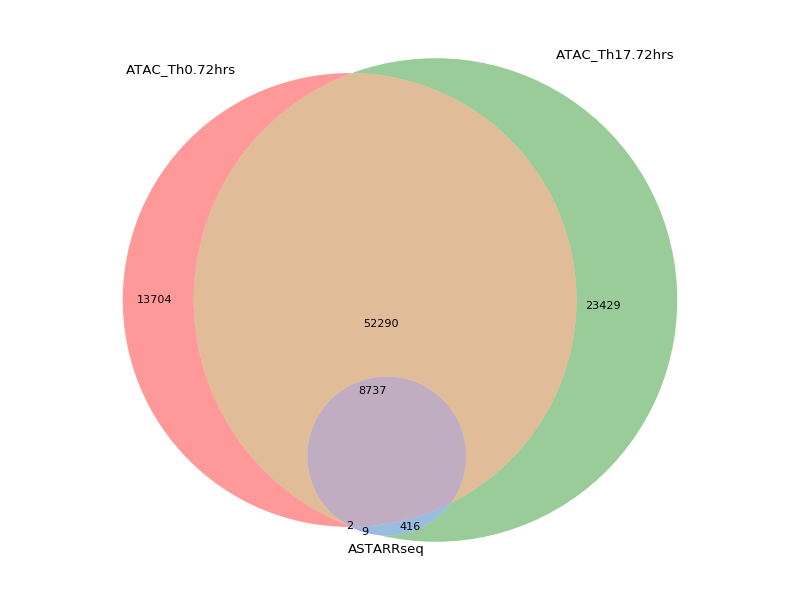

In [24]:
from IPython.display import display,Image
display(Image('/data/reddylab/Revathy/dev/Keith/data/integrative/plots/ATAC_Th0_Th17_ASTARR.png'))
    

In [25]:
!head /data/reddylab/Revathy/dev/Keith/data/integrative/plots/ATAC_Th0_Th17_ASTARR.no_ATAC_Th0.72hrs_ATAC_Th17.72hrs_ASTARRseq.bed

chr1	13312050	13313097
chr1	13848869	13850571
chr1	20634831	20635303
chr1	20693449	20694225
chr1	20730631	20732026
chr1	20766385	20767198
chr1	24612417	24613579
chr1	33900025	33900809
chr1	34185996	34186725
chr1	38847833	38849133


#### Overlap Venn diagram for peaks from ASTARR and ATACseq

In [5]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate alex
module load gcc
export PYTHONPATH="/data/reddylab/projects/GGR/analyses/group_general/top_level_scripts/GGR:${PYTHONPATH}"
python /data/reddylab/Alex/reddylab_utils/scripts/plot_overlap_as_venn_diagram.py \
  -i /data/reddylab/Revathy/dev/Keith/data/integrative/KS151_Th17ASTARR_hits.bed /data/reddylab/Revathy/dev/Keith/data/integrative/Th17_ATAC_hits.bed \
  --names ASTARR ATACseq \
  -o /data/reddylab/Revathy/dev/Keith/data/integrative/plots/ASTARR_vs_ATAChits.png /data/reddylab/Revathy/dev/Keith/data/integrative/plots/ASTARR_vs_ATAChits.pdf \
  --bed 

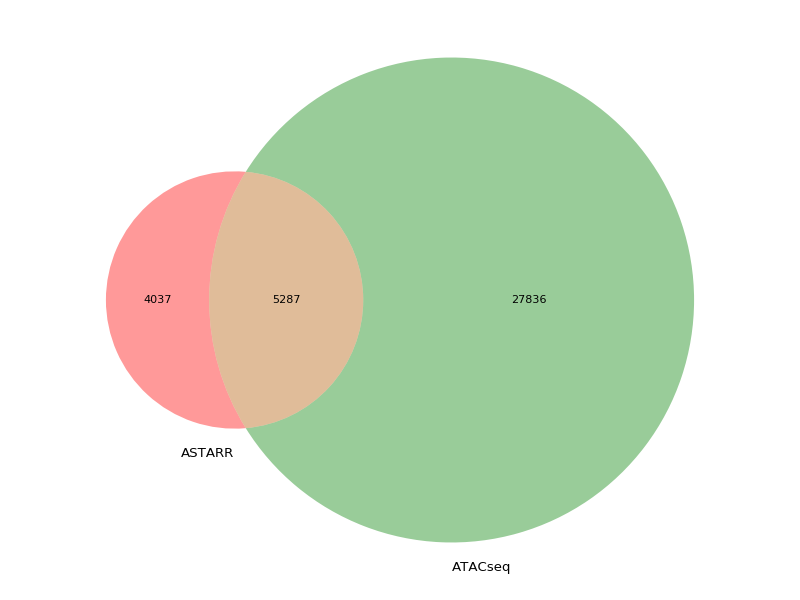

In [6]:
from IPython.display import display,Image
display(Image('/data/reddylab/Revathy/dev/Keith/data/integrative/plots/ASTARR_vs_ATAChits.png'))
    

In [53]:
!head /data/reddylab/Revathy/dev/Keith/data/integrative/Th17_ATAC_hits.bed

chr16	25011055	25011980	1238.06178598597	3.51503747264987	0.0964402599802868	3.770306698494068e-293	2.404927830701429e-288	chr16_25011055_25011980
chr2	181099184	181100691	1647.71424459393	3.0244367335685896	0.0856158912121957	4.8035678979359765e-275	1.5320019096887192e-270	chr2_181099184_181100691
chr17	24922249	24923127	1053.0361560213	4.24763116641612	0.12448761931437599	4.9267477442354075e-258	1.0475251053793296e-253	chr17_24922249_24923127
chr4	143288308	143289056	1042.98565321827	3.46179876245606	0.106136787143999	1.4014936279348196e-235	2.2348918137862592e-231	chr4_143288308_143289056
chr1	36965410	36966158	1566.20582155049	2.33668625410241	0.0717290348256236	6.983091910200348e-234	8.908470011680786e-230	chr1_36965410_36966158
chr12	70890857	70891634	1058.82930441401	4.147589455252049	0.128869031067236	4.342011179018889e-230	4.615992084414978e-226	chr12_70890857_70891634
chr13	49396769	49397328	1122.46848041886	3.2198839022783305	0.10004256732445199	3.296382742504368e-229	3.0037

Correlation plot for ATAC and ASTARR hits for all regions

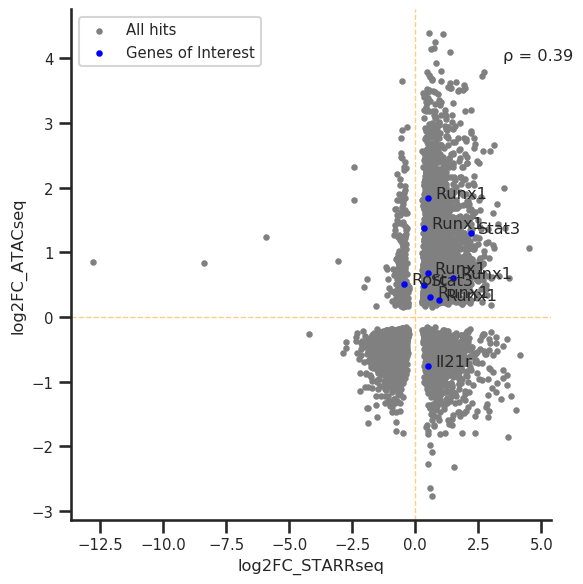

In [22]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import seaborn as sns
%matplotlib inline

from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt 

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = "\u03C1" # u'\u03C1'
    ax.annotate('%s = %.2f' % (rho, r), xy=(.9, .9), xycoords=ax.transAxes)
    
#plt.rcParams['pdf.fonttype'] = 42
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("talk", font_scale=0.65)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(1, 1, 1)

ax.scatter(ASTARR_ATAC['ASTARR_log2FoldChange'].values, 
        ASTARR_ATAC['ATAC_log2FoldChange'].values, marker='o', s=10, color='gray', label='All hits')

for x, y, t in zip(ASTARR_ATAC_with_genes_sig['ASTARR_log2FoldChange'].values,
                   ASTARR_ATAC_with_genes_sig['ATAC_log2FoldChange'].values, 
                   ASTARR_ATAC_with_genes_sig['genes'].values) :
        ax.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left',
                textcoords='offset points')

ax.scatter(ASTARR_ATAC_with_genes_sig['ASTARR_log2FoldChange'].values, 
        ASTARR_ATAC_with_genes_sig['ATAC_log2FoldChange'].values, marker='o', s=10, color='blue', label='Genes of Interest')

corrfunc(
    ASTARR_ATAC['ASTARR_log2FoldChange'].values,
    ASTARR_ATAC['ATAC_log2FoldChange'].values,
    ax=ax, method='spearman'
)

plt.xlabel('log2FC_STARRseq')
plt.ylabel('log2FC_ATACseq')
plt.legend()
sns.despine(fig,ax)

#simpleaxis(ax)
plt.tight_layout()
#plt.title('Keith_Th17.16hr_vs_Ciofani_Th17.16hr\n%d common genes' % (len(de_genes)+len(sig_genes)))

plt.axhline(0, color='#ffcc80', linewidth = 1, linestyle = 'dashed')
plt.axvline(0, color='#ffcc80', linewidth = 1, linestyle = 'dashed')
#plt.savefig('/data/reddylab/Revathy/dev/Keith/data/integrative/plots/Th17_ASTARR_ATAC_correlation_scatter_plot.pdf')
plt.show()

Correlation plot for ATAC and ASTARR hits in the promoter region

**Il17a** is the only gene among the important genes common to both ATAC DA peaks and STARRseq hits in the promoter region. 
**Stat3** and **Maf** are also expressed in the non-promoter regions

In [16]:
ASTARR_ATAC[(ASTARR_ATAC.ASTARR_log2FoldChange>0) & (ASTARR_ATAC.ATAC_log2FoldChange>0)].shape

(2397, 22)

In [22]:
sig_genes = ['Batf','Stat3','Irf4','Il17a','Rorc','Maf']

#ASTARR_with_genes[['seqnames','start','end','distanceToTSS','SYMBOL']][ASTARR_with_genes['SYMBOL'].isin(sig_genes)]
ATAC_with_genes_padj_filtered[ATAC_with_genes_padj_filtered['genes'].isin(sig_genes)]

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,pvalue,padj,genes,distance
3530,chr11_100886090_100886462,95.154636,1.063806,0.215032,1.107952e-07,4.649462e-07,Stat3,0
3531,chr11_100891415_100892652,314.771909,0.375844,0.115630,7.629818e-04,1.755557e-03,Stat3,0
3533,chr11_100897686_100898303,80.004186,-1.011329,0.212781,3.416963e-07,1.345548e-06,Stat3,0
3534,chr11_100899572_100899958,75.415539,0.957652,0.248082,2.186089e-05,6.639457e-05,Stat3,0
3535,chr11_100904751_100905370,138.022886,1.297113,0.200021,7.077066e-12,4.657152e-11,Stat3,0
3536,chr11_100912426_100913302,380.094681,-0.619167,0.107128,3.416793e-09,1.704415e-08,Stat3,0
3539,chr11_100933642_100934452,163.820917,-0.904752,0.149650,3.523609e-10,1.953389e-09,Stat3,0
3540,chr11_100938823_100940227,2386.960024,0.499867,0.052767,1.505957e-21,2.138445e-20,Stat3,0
10698,chr12_85679744_85680313,36.455449,-1.488327,0.318965,1.810227e-07,7.379977e-07,Batf,6356
10699,chr12_85686242_85688285,648.890546,-0.242595,0.083523,3.019058e-03,6.139371e-03,Batf,0


## Integrative analysis with RNAseq, ATACseq, STARRseq for Th17

Input with_genes for RNAseq, ATACseq hits and STARRseq hits for Th17 and sort them for padj<0.01. Identify the top DE genes for RNAseq and find the nearest peaks for them

There are **7644** DE genes from RNAseq with padj<0.01. There are **5272** common DA peaks from ATACseq and ASTARRseq data when padj<0.01. These 2 tables are merged to understand the genes with peaks near them. (First merge and sort based on log2FC of RNAseq)


In [3]:
import pandas as pd
import numpy as np

ASTARR_ATAC_with_closest_genes = pd.read_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/Th17_ASTARR_ATAC_subset.closest_gene.txt', sep='\t', names=['chr_start_end','genes','distance'])
ASTARR_ATAC_with_log_values = pd.read_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/Th17_ASTARR_ATAC_subset.txt', sep='\t', names=['chr_start_end','ASTARR_log2FoldChange','ATAC_log2FoldChange'])
ASTARR_ATAC_genes_log_values = ASTARR_ATAC_with_log_values.merge(ASTARR_ATAC_with_closest_genes, how='inner', on='chr_start_end')
ASTARR_ATAC_genes_log_values = ASTARR_ATAC_genes_log_values.rename(columns = {'genes':'GeneName'})
ASTARR_ATAC_genes_log_values.to_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/Th17_ASTARR_ATAC_gene_log_values.txt', sep='\t', index=False)

RNA_with_genes = pd.read_csv('/data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/differential_testing/deseq2/timeseries/Th17.Sorted.72hr_vs_mmTh0.Sorted.72hr.with_genes.txt', sep='\t')
RNA_with_genes_filtered = RNA_with_genes[(RNA_with_genes['padj']<0.01) & (RNA_with_genes['log2FoldChange'].sort_values(ascending=False))]
RNA_with_genes_filtered.to_csv('/data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/differential_testing/deseq2/timeseries/Th17.Sorted.72hr_vs_mmTh0.Sorted.72hr.with_genes_padjFiltered0.01.txt', sep='\t')

RNA_ATAC_ASTARR = ASTARR_ATAC_genes_log_values.merge(RNA_with_genes_filtered, on='GeneName', how='inner')
RNA_ATAC_ASTARR = RNA_ATAC_ASTARR.sort_values(by='log2FoldChange', ascending=False)
RNA_ATAC_ASTARR = RNA_ATAC_ASTARR[['chr_start_end', 'ASTARR_log2FoldChange', 'ATAC_log2FoldChange','log2FoldChange','GeneName','distance']]
RNA_ATAC_ASTARR = RNA_ATAC_ASTARR.rename(columns = {'log2FoldChange':'RNA_log2FoldChange'})
RNA_ATAC_ASTARR['norm_ASTARR_log2FC'] = RNA_ATAC_ASTARR['ASTARR_log2FoldChange']/((max(RNA_ATAC_ASTARR['ASTARR_log2FoldChange']))-(min(RNA_ATAC_ASTARR['ASTARR_log2FoldChange'])))
RNA_ATAC_ASTARR['norm_ATAC_log2FC'] = RNA_ATAC_ASTARR['ATAC_log2FoldChange']/((max(RNA_ATAC_ASTARR['ATAC_log2FoldChange']))-(min(RNA_ATAC_ASTARR['ATAC_log2FoldChange'])))
RNA_ATAC_ASTARR['norm_RNA_log2FC'] = RNA_ATAC_ASTARR['RNA_log2FoldChange']/((max(RNA_ATAC_ASTARR['RNA_log2FoldChange']))-(min(RNA_ATAC_ASTARR['RNA_log2FoldChange'])))

RNA_ATAC_ASTARR.to_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/Th17_RNA_ATAC_ASTARR_with_genes.txt', sep='\t')
#RNA_ATAC_ASTARR_distanceSort = RNA_ATAC_ASTARR[np.abs(RNA_ATAC_ASTARR['distance'])<3000]

sig_genes = ['Maf', 'Il17a', 'Rorc', 'Stat3', 'Stat5', 'Batf', 'Irf4', 'Runx1', 'Il21r', 'Tbx21', 'Foxp3']
RNA_ATAC_ASTARR_spGenes = RNA_ATAC_ASTARR[RNA_ATAC_ASTARR['GeneName'].isin(sig_genes)]
#RNA_ATAC_ASTARR_distanceSort_spGenes = RNA_ATAC_ASTARR_distanceSort[RNA_ATAC_ASTARR_distanceSort['GeneName'].isin(sig_genes)]


NameError: name 'plt' is not defined

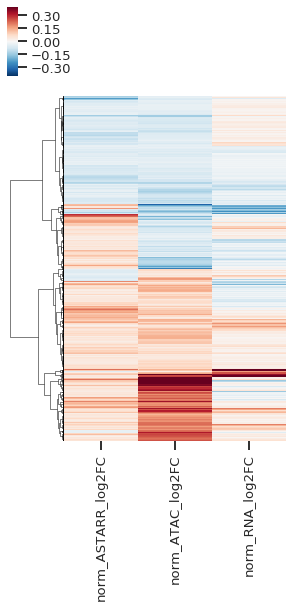

In [5]:
import seaborn as sns

sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("talk", font_scale=0.8)
#plt.rcParams.update({'figure.figsize':(5,8), 'figure.dpi':100})

g = sns.clustermap(RNA_ATAC_ASTARR.loc[:, ['norm_ASTARR_log2FC','norm_ATAC_log2FC','norm_RNA_log2FC']],
               vmin=-0.4,
               vmax=0.4,
               cmap='RdBu_r',
               method='ward',
               figsize=[5,8],
               col_cluster=False,
               yticklabels='')

plt.show()
#plt.savefig('/data/reddylab/Revathy/dev/Keith/data/integrative/plots/Th17_ATAC_RNA_ASTARR_100kb_heatmap.pdf')

There are **2912 hits** when distance filter is not applied. There are **1073 hits** when distance to TSS is less than 3kb for DE genes when sorted in descending order of log2FC. 

Below given scatterplot represents the hits for ASTARRseq and ATACseq for promoter, distal and all regions. 

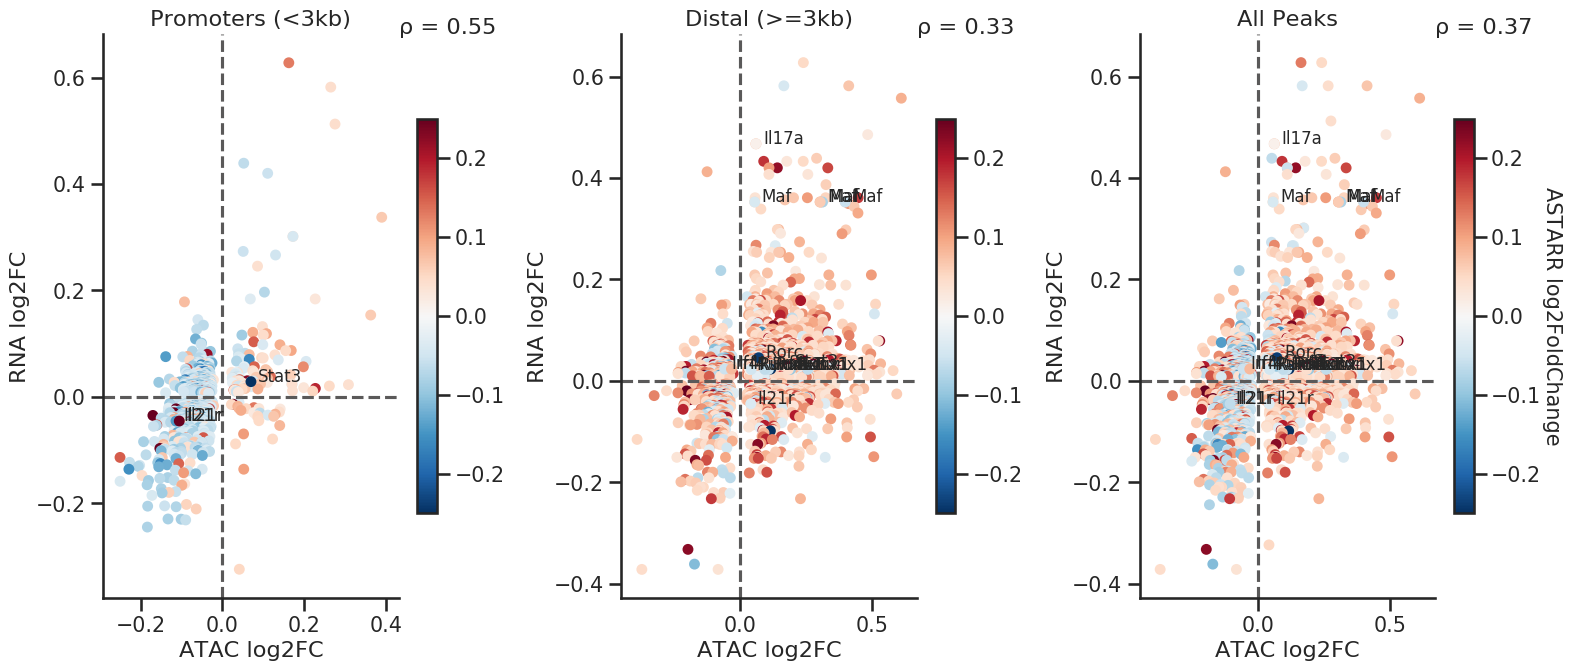

In [27]:
### Scatterplot for promoter(<3kb), distal(>=3kb) and all regions for ATACseq vs ASTARRseq

import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import seaborn as sns
import numpy as np
%matplotlib inline

from scipy.stats import pearsonr, spearmanr

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = "\u03C1" # u'\u03C1'
    ax.annotate('%s = %.2f' % (rho, r), xy=(1, 1), xycoords=ax.transAxes)
    
#plt.rcParams['pdf.fonttype'] = 42
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("talk", font_scale=0.9)
plt.rcParams.update({'figure.figsize':(16,7), 'figure.dpi':100})

fig, ax = plt.subplots(1, 3)

ax1 = ax.flatten()[0]
points = ax1.scatter(
    RNA_ATAC_ASTARR.loc[np.abs(RNA_ATAC_ASTARR.distance)<3000, 'norm_ATAC_log2FC'], 
    RNA_ATAC_ASTARR.loc[np.abs(RNA_ATAC_ASTARR.distance)<3000, 'norm_RNA_log2FC'],
    c=RNA_ATAC_ASTARR.loc[np.abs(RNA_ATAC_ASTARR.distance)<3000, 'norm_ASTARR_log2FC'],
    cmap='RdBu_r', marker='o', s=40)

for x, y, t in zip(
    RNA_ATAC_ASTARR_spGenes.loc[np.abs(RNA_ATAC_ASTARR_spGenes.distance)<3000, 'norm_ATAC_log2FC'],
    RNA_ATAC_ASTARR_spGenes.loc[np.abs(RNA_ATAC_ASTARR_spGenes.distance)<3000, 'norm_RNA_log2FC'], 
    RNA_ATAC_ASTARR_spGenes.loc[np.abs(RNA_ATAC_ASTARR_spGenes.distance)<3000, 'GeneName']) :
    ax1.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=12)

ax1.scatter(
    RNA_ATAC_ASTARR_spGenes.loc[np.abs(RNA_ATAC_ASTARR_spGenes.distance)<3000, 'norm_ATAC_log2FC'], 
    RNA_ATAC_ASTARR_spGenes.loc[np.abs(RNA_ATAC_ASTARR_spGenes.distance)<3000, 'norm_RNA_log2FC'],
    c=RNA_ATAC_ASTARR_spGenes.loc[np.abs(RNA_ATAC_ASTARR_spGenes.distance)<3000, 'norm_ASTARR_log2FC'],
    cmap='RdBu_r', marker='o', s=40)

corrfunc(
    RNA_ATAC_ASTARR.loc[np.abs(RNA_ATAC_ASTARR.distance)<3000, 'norm_ATAC_log2FC'], 
    RNA_ATAC_ASTARR.loc[np.abs(RNA_ATAC_ASTARR.distance)<3000, 'norm_RNA_log2FC'],
    ax=ax1, method='spearman')

ax1.set_xlim(ax1.get_xlim())
ax1.set_ylim(ax1.get_ylim())
ax1.vlines(0, ax1.get_ylim()[0], ax1.get_ylim()[1], color='#5A5959', linestyle='--')
ax1.hlines(0, ax1.get_xlim()[0], ax1.get_xlim()[1], color='#5A5959', linestyle='--')
ax1.set_xlabel('ATAC log2FC')
ax1.set_ylabel('RNA log2FC')
ax1.set_title('Promoters (<3kb)')

cbar = fig.colorbar(points, shrink=0.7, ax=ax1)
#cbar.set_label('ASTARR log2FoldChange', rotation=270, fontsize=15, labelpad=15)
cbar.mappable.set_clim(-0.25,0.25)

ax2 = ax.flatten()[1]
points = ax2.scatter(
    RNA_ATAC_ASTARR.loc[np.abs(RNA_ATAC_ASTARR.distance)>=3000, 'norm_ATAC_log2FC'], 
    RNA_ATAC_ASTARR.loc[np.abs(RNA_ATAC_ASTARR.distance)>=3000, 'norm_RNA_log2FC'],
    c=RNA_ATAC_ASTARR.loc[np.abs(RNA_ATAC_ASTARR.distance)>=3000, 'norm_ASTARR_log2FC'],
    cmap='RdBu_r', marker='o', s=40)

for x, y, t in zip(
    RNA_ATAC_ASTARR_spGenes.loc[np.abs(RNA_ATAC_ASTARR_spGenes.distance)>=3000, 'norm_ATAC_log2FC'],
    RNA_ATAC_ASTARR_spGenes.loc[np.abs(RNA_ATAC_ASTARR_spGenes.distance)>=3000, 'norm_RNA_log2FC'], 
    RNA_ATAC_ASTARR_spGenes.loc[np.abs(RNA_ATAC_ASTARR_spGenes.distance)>=3000, 'GeneName']) :
    ax2.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=12)
    
ax2.scatter(
    RNA_ATAC_ASTARR_spGenes.loc[np.abs(RNA_ATAC_ASTARR_spGenes.distance)>=3000, 'norm_ATAC_log2FC'], 
    RNA_ATAC_ASTARR_spGenes.loc[np.abs(RNA_ATAC_ASTARR_spGenes.distance)>=3000, 'norm_RNA_log2FC'], 
    c=RNA_ATAC_ASTARR_spGenes.loc[np.abs(RNA_ATAC_ASTARR_spGenes.distance)>=3000, 'norm_ASTARR_log2FC'],
    cmap='RdBu_r', marker='o', s=40)
corrfunc(
    RNA_ATAC_ASTARR.loc[np.abs(RNA_ATAC_ASTARR.distance)>=3000, 'norm_ATAC_log2FC'], 
    RNA_ATAC_ASTARR.loc[np.abs(RNA_ATAC_ASTARR.distance)>=3000, 'norm_RNA_log2FC'],
    ax=ax2, method='spearman')

ax2.set_xlim(ax2.get_xlim())
ax2.set_ylim(ax2.get_ylim())
ax2.vlines(0, ax2.get_ylim()[0], ax2.get_ylim()[1], color='#5A5959', linestyle='--')
ax2.hlines(0, ax2.get_xlim()[0], ax2.get_xlim()[1], color='#5A5959', linestyle='--')
ax2.set_xlabel('ATAC log2FC')
ax2.set_ylabel('RNA log2FC')
ax2.set_title('Distal (>=3kb)')

cbar = fig.colorbar(points, shrink=0.7, ax=ax2)
#cbar.set_label('ASTARR log2FoldChange', rotation=270, fontsize=15, labelpad=15)
cbar.mappable.set_clim(-0.25,0.25)

ax3 = ax.flatten()[2]
points = ax3.scatter(
    RNA_ATAC_ASTARR.loc[:, 'norm_ATAC_log2FC'], 
    RNA_ATAC_ASTARR.loc[:, 'norm_RNA_log2FC'],
    c=RNA_ATAC_ASTARR.loc[:, 'norm_ASTARR_log2FC'],
    cmap='RdBu_r', marker='o', s=40)

for x, y, t in zip(
    RNA_ATAC_ASTARR_spGenes.loc[:, 'norm_ATAC_log2FC'],
    RNA_ATAC_ASTARR_spGenes.loc[:, 'norm_RNA_log2FC'], 
    RNA_ATAC_ASTARR_spGenes.loc[:, 'GeneName']) :
    ax3.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=12)
    
ax3.scatter(
    RNA_ATAC_ASTARR_spGenes.loc[:, 'norm_ATAC_log2FC'], 
    RNA_ATAC_ASTARR_spGenes.loc[:, 'norm_RNA_log2FC'], 
    c=RNA_ATAC_ASTARR_spGenes.loc[:, 'norm_ASTARR_log2FC'],
    cmap='RdBu_r', marker='o', s=40)
corrfunc(
    RNA_ATAC_ASTARR.loc[:, 'norm_ATAC_log2FC'], 
    RNA_ATAC_ASTARR.loc[:, 'norm_RNA_log2FC'],
    ax=ax3, method='spearman')

ax3.set_xlim(ax3.get_xlim())
ax3.set_ylim(ax3.get_ylim())
ax3.vlines(0, ax3.get_ylim()[0], ax3.get_ylim()[1], color='#5A5959', linestyle='--')
ax3.hlines(0, ax3.get_xlim()[0], ax3.get_xlim()[1], color='#5A5959', linestyle='--')
ax3.set_xlabel('ATAC log2FC')
ax3.set_ylabel('RNA log2FC')
ax3.set_title('All Peaks')

cbar = fig.colorbar(points, shrink=0.7, ax=ax3)
cbar.set_label('ASTARR log2FoldChange', rotation=270, fontsize=15, labelpad=15)
cbar.mappable.set_clim(-0.25,0.25)

sns.despine(fig,ax)
plt.tight_layout()
plt.savefig('/data/reddylab/Revathy/dev/Keith/data/integrative/plots/Th17_RNA_ATAC_ASTARR_coordinate_plots_normalized.pdf')
plt.show()

Filter out all the peaks with negative log2FC for ASTARR and ATACseq data where distance to TSS < 3kb and get the list of unique genes present near these peaks

In [70]:
RNA_ATAC_ASTARR_distanceSort_neglog2FC = RNA_ATAC_ASTARR_distanceSort[(RNA_ATAC_ASTARR_distanceSort['ASTARR_log2FoldChange']<0) & (RNA_ATAC_ASTARR_distanceSort['ATAC_log2FoldChange']<0)]
#RNA_ATAC_ASTARR_distanceSort_neglog2FC
genes_from_neglog2FC_hits = RNA_ATAC_ASTARR_distanceSort_neglog2FC['GeneName'].unique().tolist()

#### DP_GP with the list of genes present near the peaks with negative log2FC for ATACseq and ASTARR

In [76]:
## logFC values for timecourse RNAseq data for the all genes of Th17 

Th17_log2FC_time = pd.read_csv('/data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/clustering/Th17.logFC.txt', sep='\t')

## filtered table with genes from the list of unique genes present near the decreasing DA peaks
Th17_log2FC_time_genelist = Th17_log2FC_time[Th17_log2FC_time.gene.isin(genes_from_neglog2FC_hits)]
Th17_log2FC_time_genelist.to_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/Genes_from_negativeLog2FoldChange_ASTARR_ATAC_hits.txt', sep='\t', index = False)


In [78]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate alex
mkdir -p /data/reddylab/Revathy/dev/Keith/data/integrative/dp_gp
sbatch -pnew,all \
    --mem=64G \
    --array=0-1 \
    -o /data/reddylab/Revathy/dev/Keith/data/integrative/dp_gp/Th17_alpha_dp_gp.out \
    <<'EOF'
#!/bin/sh
module load gcc
#SBATCH --cpus-per-task=1
#SBATCH --mem=64G
outfile="/data/reddylab/Revathy/dev/Keith/data/integrative/dp_gp/Th17_neglog2FC_ASTARR_ATAC_genes.alpha_0.001"
infile="/data/reddylab/Revathy/dev/Keith/data/integrative/Genes_from_negativeLog2FoldChange_ASTARR_ATAC_hits.txt"
DP_GP_cluster.py \
--alpha 0.001 \
--true_times \
-i ${infile}  \
-o ${outfile} \
-p png \
--plot
EOF

Submitted batch job 24971232


Results of DP_GP

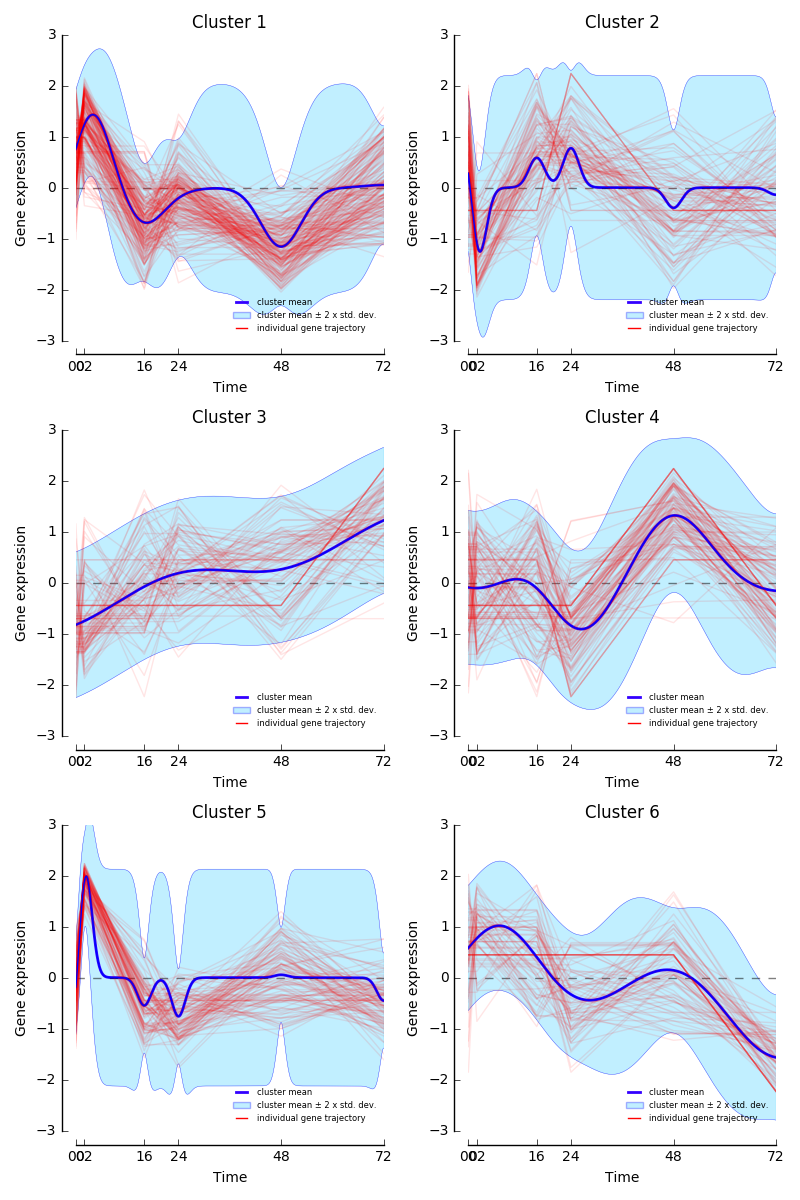

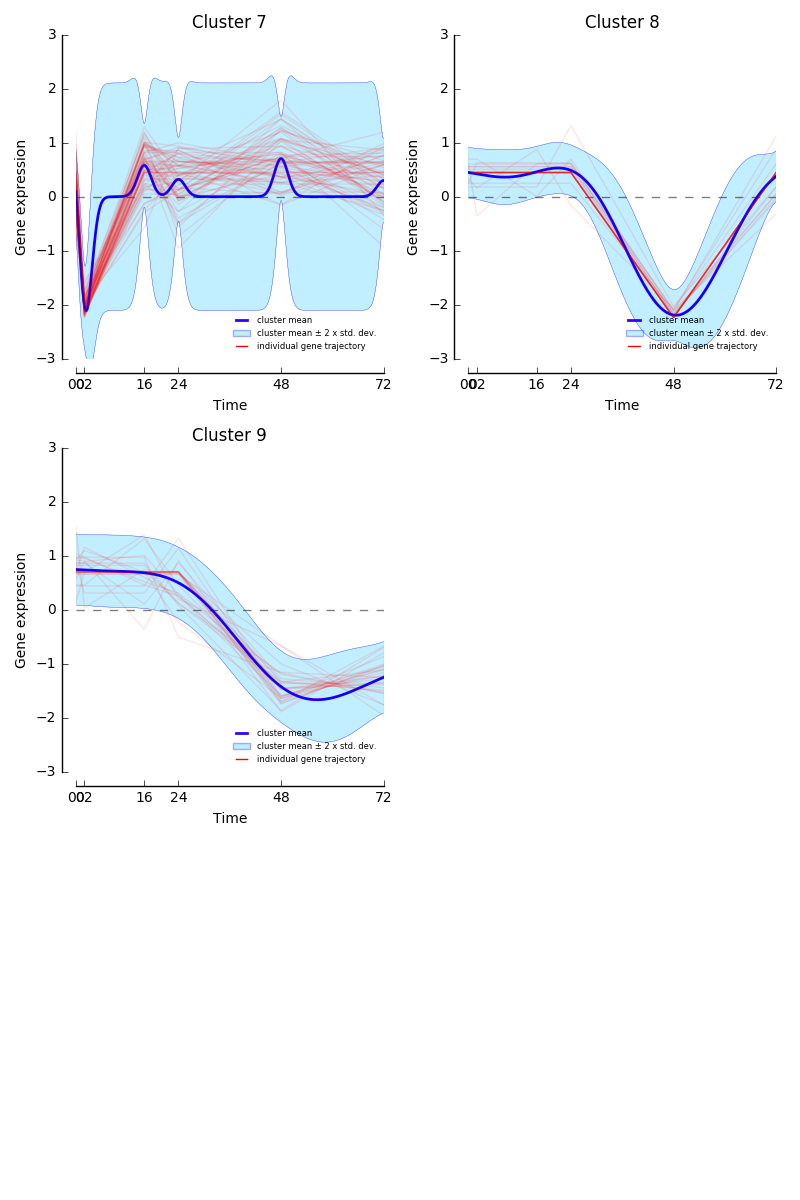

In [10]:
from IPython.display import display,Image
images = ['Th17_neglog2FC_ASTARR_ATAC_genes.alpha_0.001_gene_expression_fig_1',
          'Th17_neglog2FC_ASTARR_ATAC_genes.alpha_0.001_gene_expression_fig_2']
for img in images:
    display(Image('/data/reddylab/Revathy/dev/Keith/data/integrative/dp_gp/%s.png' %(img)))
    

### STARRseq peaks to nearest DE genes

ASTARR with genes and log2FC values

In [73]:
import pandas as pd

ASTARR_with_genes = pd.read_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/KS151_Th17ASTARR_hits_subset.closest_gene.txt', sep='\t', header=None, names=['chr_start_end','GeneName','distance'])
ASTARR_with_log2FC = pd.read_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/KS151_Th17ASTARR_hits.bed', sep='\t', header=None, names=['chr','start','end','baseMean','ASTARR_log2FoldChange','lfcSE','pvalue','padj','chr_start_end'])
ASTARR_with_gene_log2FC = ASTARR_with_genes.merge(ASTARR_with_log2FC, on='chr_start_end', how='inner')
ASTARR_with_gene_log2FC = ASTARR_with_gene_log2FC[['chr_start_end','GeneName','distance','ASTARR_log2FoldChange']]
ASTARR_with_gene_log2FC.to_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/Th17_ASTARR_with_genes_log2FC_values.txt', sep='\t')

RNA_with_genes_filtered = pd.read_csv('/data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/differential_testing/deseq2/timeseries/Th17.Sorted.72hr_vs_mmTh0.Sorted.72hr.with_genes_padjFiltered0.01.txt', sep='\t')
ASTARR_RNA = ASTARR_with_gene_log2FC.merge(RNA_with_genes_filtered, on='GeneName', how='inner')
ASTARR_RNA = ASTARR_RNA[['chr_start_end','GeneName','distance','ASTARR_log2FoldChange','log2FoldChange']]
ASTARR_RNA = ASTARR_RNA.rename(columns = {'log2FoldChange': 'RNA_log2FoldChange'})
ASTARR_RNA

,chr_start_end,GeneName,distance,ASTARR_log2FoldChange,RNA_log2FoldChange
0,chr1_5015368_5015738,Atp6v1h,54279,0.506028,-0.364059
1,chr1_7397704_7398415,Pcmtd1,-308786,-0.365438,0.727460
2,chr1_9699966_9700748,Mybl1,0,-1.166399,0.780765
3,chr1_9797963_9798591,Sgk3,0,-1.508504,1.499604
4,chr1_10037898_10038211,Cops5,0,0.490100,0.351256
...,...,...,...,...,...
5161,chrX_164034289_164034645,Car5b,-6293,0.627762,2.907671
5162,chrX_167020005_167020267,Tmsb4x,189048,1.419586,0.372152
5163,chrX_167091956_167092274,Tmsb4x,117041,1.443035,0.372152
5164,chrX_167130969_167131574,Tmsb4x,77741,0.365062,0.372152


There are 5166 hits in STARRseq with DE genes nearby. Identify nearest genes in the promoter regions (<3kb) 

In [74]:
ASTARR_RNA_distanceSort = ASTARR_RNA[np.abs(ASTARR_RNA['distance'])<3000]

sig_genes = ['Maf', 'Il17a', 'Rorc', 'Stat3', 'Stat5', 'Batf', 'Irf4', 'Runx1', 'Il21r', 'Tbx21', 'Foxp3']
ASTARR_RNA_spGenes = ASTARR_RNA[ASTARR_RNA['GeneName'].isin(sig_genes)]
ASTARR_RNA_distanceSort_spGenes = ASTARR_RNA_distanceSort[ASTARR_RNA_distanceSort['GeneName'].isin(sig_genes)]


Scatterplots for RNAseq and ASTARRseq indicating how promoters(<3kb), distal(>=3kb) and all genes/peaks are distributed

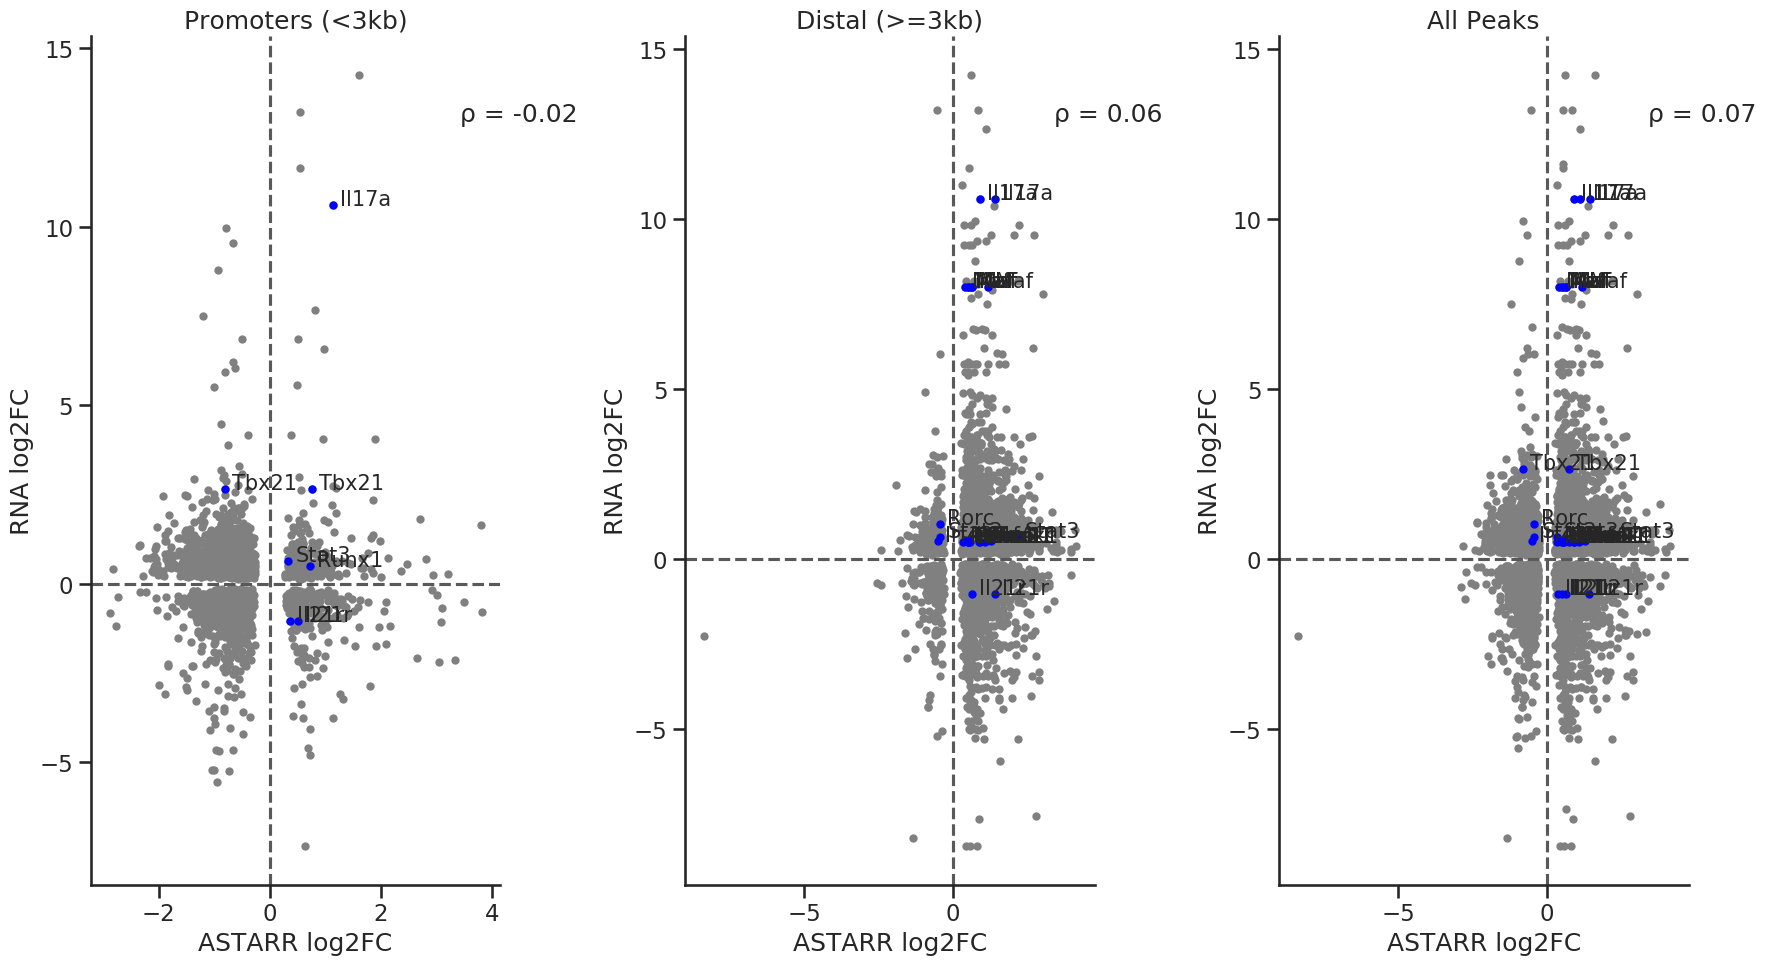

In [75]:
### Scatterplot for promoter(<3kb), distal(>=3kb) and all regions for ATACseq vs ASTARRseq

import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import seaborn as sns
import numpy as np
%matplotlib inline

from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt 

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = "\u03C1" # u'\u03C1'
    ax.annotate('%s = %.2f' % (rho, r), xy=(.9, .9), xycoords=ax.transAxes)
    
#plt.rcParams['pdf.fonttype'] = 42
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("talk", font_scale=1)
plt.rcParams.update({'figure.figsize':(15,8), 'figure.dpi':100})

fig, ax = plt.subplots(1, 3, figsize=(18,10))

ax1 = ax.flatten()[0]
points = ax1.scatter(
    ASTARR_RNA.loc[np.abs(ASTARR_RNA.distance)<3000, 'ASTARR_log2FoldChange'], 
    ASTARR_RNA.loc[np.abs(ASTARR_RNA.distance)<3000, 'RNA_log2FoldChange'],
    color='gray', marker='o', s=20, label='All hits')

for x, y, t in zip(
    ASTARR_RNA_spGenes.loc[np.abs(ASTARR_RNA_spGenes.distance)<3000, 'ASTARR_log2FoldChange'],
    ASTARR_RNA_spGenes.loc[np.abs(ASTARR_RNA_spGenes.distance)<3000, 'RNA_log2FoldChange'], 
    ASTARR_RNA_spGenes.loc[np.abs(ASTARR_RNA_spGenes.distance)<3000, 'GeneName']) :
    ax1.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=15)

ax1.scatter(ASTARR_RNA_spGenes.loc[np.abs(ASTARR_RNA_spGenes.distance)<3000, 'ASTARR_log2FoldChange'], 
    ASTARR_RNA_spGenes.loc[np.abs(ASTARR_RNA_spGenes.distance)<3000, 'RNA_log2FoldChange'], marker='o', s=20, color='blue', label='Genes of Interest')

corrfunc(
    ASTARR_RNA.loc[np.abs(ASTARR_RNA.distance)<3000, 'ASTARR_log2FoldChange'], 
    ASTARR_RNA.loc[np.abs(ASTARR_RNA.distance)<3000, 'RNA_log2FoldChange'],
    ax=ax1, method='spearman')

ax1.set_xlim(ax1.get_xlim())
ax1.set_ylim(ax1.get_ylim())
ax1.vlines(0, ax1.get_ylim()[0], ax1.get_ylim()[1], color='#5A5959', linestyle='--')
ax1.hlines(0, ax1.get_xlim()[0], ax1.get_xlim()[1], color='#5A5959', linestyle='--')
ax1.set_xlabel('ASTARR log2FC')
ax1.set_ylabel('RNA log2FC')
ax1.set_title('Promoters (<3kb)')


ax2 = ax.flatten()[1]
points = ax2.scatter(
    ASTARR_RNA.loc[np.abs(ASTARR_RNA.distance)>=3000, 'ASTARR_log2FoldChange'], 
    ASTARR_RNA.loc[np.abs(ASTARR_RNA.distance)>=3000, 'RNA_log2FoldChange'],
    color='gray', marker='o', s=20, label='All hits')

for x, y, t in zip(
    ASTARR_RNA_spGenes.loc[np.abs(ASTARR_RNA_spGenes.distance)>=3000, 'ASTARR_log2FoldChange'],
    ASTARR_RNA_spGenes.loc[np.abs(ASTARR_RNA_spGenes.distance)>=3000, 'RNA_log2FoldChange'], 
    ASTARR_RNA_spGenes.loc[np.abs(ASTARR_RNA_spGenes.distance)>=3000, 'GeneName']) :
    ax2.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=15)
    
ax2.scatter(ASTARR_RNA_spGenes.loc[np.abs(ASTARR_RNA_spGenes.distance)>=3000, 'ASTARR_log2FoldChange'], 
    ASTARR_RNA_spGenes.loc[np.abs(ASTARR_RNA_spGenes.distance)>=3000, 'RNA_log2FoldChange'], marker='o', s=20, color='blue', label='Genes of Interest')
corrfunc(
    ASTARR_RNA.loc[np.abs(ASTARR_RNA.distance)>=3000, 'ASTARR_log2FoldChange'], 
    ASTARR_RNA.loc[np.abs(ASTARR_RNA.distance)>=3000, 'RNA_log2FoldChange'],
    ax=ax2, method='spearman')

ax2.set_xlim(ax2.get_xlim())
ax2.set_ylim(ax2.get_ylim())
ax2.vlines(0, ax2.get_ylim()[0], ax2.get_ylim()[1], color='#5A5959', linestyle='--')
ax2.hlines(0, ax2.get_xlim()[0], ax2.get_xlim()[1], color='#5A5959', linestyle='--')
ax2.set_xlabel('ASTARR log2FC')
ax2.set_ylabel('RNA log2FC')
ax2.set_title('Distal (>=3kb)')


ax3 = ax.flatten()[2]
points = ax3.scatter(
    ASTARR_RNA.loc[:, 'ASTARR_log2FoldChange'], 
    ASTARR_RNA.loc[:, 'RNA_log2FoldChange'],
    color='gray', marker='o', s=20, label='All hits')

for x, y, t in zip(
    ASTARR_RNA_spGenes.loc[:, 'ASTARR_log2FoldChange'],
    ASTARR_RNA_spGenes.loc[:, 'RNA_log2FoldChange'], 
    ASTARR_RNA_spGenes.loc[:, 'GeneName']) :
    ax3.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=15)
    
ax3.scatter(ASTARR_RNA_spGenes.loc[:, 'ASTARR_log2FoldChange'], 
    ASTARR_RNA_spGenes.loc[:, 'RNA_log2FoldChange'], marker='o', s=20, color='blue', label='Genes of Interest')
corrfunc(
    ASTARR_RNA.loc[:, 'ASTARR_log2FoldChange'], 
    ASTARR_RNA.loc[:, 'RNA_log2FoldChange'],
    ax=ax3, method='spearman')

ax3.set_xlim(ax3.get_xlim())
ax3.set_ylim(ax3.get_ylim())
ax3.vlines(0, ax3.get_ylim()[0], ax3.get_ylim()[1], color='#5A5959', linestyle='--')
ax3.hlines(0, ax3.get_xlim()[0], ax3.get_xlim()[1], color='#5A5959', linestyle='--')
ax3.set_xlabel('ASTARR log2FC')
ax3.set_ylabel('RNA log2FC')
ax3.set_title('All Peaks')

# cbar = fig.colorbar(points)
# cbar.set_label('abs. distance to closest TSS', rotation=270)

sns.despine(fig,ax)
plt.tight_layout()
plt.show()

#### 4/9 - Next Steps:

* [x] Take the Green region (ATACseq peaks) from the Venn diagram (the peaks that do not intersect with the ASTARRseq) and identify the nearest genes (~60kb) in the nearby regions. Filter out the top genes from the list with the top logFC values
* [x] Replot the co-ordinate plots with the set of ATACseq peaks (that do not intersect with the ASTARR peaks) along with the RNAseq DE genes
* [x] Co-ordinate plots with all DA ATACseq peaks (padj<0.01) and RNAseq DE genes where the gene list is obtained from the Comparison between Keith's RNAseq data and Maria Ciofani's 2012 RNAseq data for Th17 genes (for the 48hr timepoint)
* [x] Include the distal regions in the co-ordinate plots plotted for comapring ATACseq peaks with ASTARR peaks and RNAseq genes with ASTARR peaks


Co-ordinate plots with all DA ATACseq peaks (padj<0.01) and RNAseq DE genes where the gene list is obtained from the Comparison between Keith's RNAseq data and Maria Ciofani's 2012 RNAseq data for Th17 genes (for the 48hr timepoint)

In [2]:
import pandas as pd
Keith_48h = pd.read_csv('/data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/Th17.Bulk.48hr_vs_mmTh0.Bulk.48hr.with_genes.sig_DE.txt', sep = '\t')
Ciofani_48h = pd.read_csv('/data/reddylab/Revathy/dev/rna-seq_Siklenka/2012_Ciofani/results/rna_seq/Th17.Bulk.48h_vs_Th0.Bulk.48h.with_genes.sig_DE.txt', sep = '\t')
Keith_ATAC = pd.read_csv('/data/reddylab/Revathy/dev/atac-seq_Siklenka/results/atac_seq_19/Th17.atacseq.activated_sorted.072h_vs_Th0.atacseq.activated_sorted.072h.with_closest_gene.txt', sep='\t')
Keith_ATAC_padj_filtered = Keith_ATAC[Keith_ATAC['padj']<0.01]
Keith_ATAC_padj_filtered = Keith_ATAC_padj_filtered.rename(columns={'log2FoldChange':'ATAC_log2FoldChange'})

Keith_Ciofani = Keith_48h.merge(Ciofani_48h, on='Unnamed: 0', how='inner')
Keith_Ciofani = Keith_Ciofani.drop(columns=['Unnamed: 0','baseMean_x','lfcSE_x','stat','pvalue_x','padj_x','GeneType_x',
                                            'baseMean_y','log2FoldChange_y','lfcSE_y','pvalue_y','padj_y','GeneName_y','GeneType_y'])
Keith_Ciofani.rename(columns={'log2FoldChange_x':'RNA_log2FoldChange',
                              'GeneName_x':'genes'}, inplace=True)
Keith_Ciofani.to_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/Th17_Keith_Ciofani_combined_RNA_DE_genes.txt', sep='\t')
Keith_Ciofani

,RNA_log2FoldChange,genes
0,12.795124,Il17a
1,2.845244,Timp2
2,-2.395463,Dnmt3a
3,5.238303,Id2
4,3.215856,Ahr
...,...,...
955,-0.414537,Plaur
956,-0.106458,Plk1
957,0.111219,Noc3l
958,-0.103385,Unc119b


In [119]:
Keith_ATAC[Keith_ATAC['padj']<0.01]

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genes,distance
2,chr10_100460341_100461152,20.134439,1.837539,0.328189,5.599024,2.155624e-08,2.098286e-07,Tmtc3,0
3,chr10_100461281_100462248,22.218665,0.824395,0.265605,3.103839,1.910274e-03,6.129670e-03,Tmtc3,0
6,chr10_100518105_100518777,16.355802,0.951327,0.268071,3.548791,3.870040e-04,1.523161e-03,Cep290,0
8,chr10_100542609_100543946,375.047651,0.606501,0.189179,3.205957,1.346139e-03,4.524224e-03,Cep290,0
10,chr10_100566917_100567952,63.505799,0.959139,0.220906,4.341844,1.412919e-05,7.939323e-05,Cep290,0
...,...,...,...,...,...,...,...,...,...
103273,chrX_99593228_99594278,24.837450,-0.966626,0.228921,-4.222537,2.415676e-05,1.288964e-04,Gm14816,93203
103280,chrY_1115286_1116908,40.969395,5.525479,1.857242,2.975099,2.928941e-03,8.871756e-03,Uty,0
103285,chrY_1269139_1270043,23.409721,7.230832,2.280129,3.171238,1.517908e-03,5.020667e-03,Ddx3y,0
103287,chrY_140581_145096,20.388171,6.424624,1.926641,3.334624,8.541466e-04,3.041581e-03,Gm29277,61055


In [120]:
!wc -l /data/reddylab/Revathy/dev/atac-seq_Siklenka/results/atac_seq_19/Th17.atacseq.activated_sorted.072h_vs_Th0.atacseq.activated_sorted.072h.with_closest_gene.txt

103308 /data/reddylab/Revathy/dev/atac-seq_Siklenka/results/atac_seq_19/Th17.atacseq.activated_sorted.072h_vs_Th0.atacseq.activated_sorted.072h.with_closest_gene.txt


In [1]:
ATAC_RNA = Keith_Ciofani.merge(Keith_ATAC_padj_filtered, on='genes', how='inner')
ATAC_RNA.drop(columns=['baseMean','lfcSE','stat','pvalue'], inplace=True)
ATAC_RNA.rename(columns = {'Unnamed: 0':'chr_start_end'}, inplace=True)
ATAC_RNA = ATAC_RNA[['chr_start_end','genes','ATAC_log2FoldChange','RNA_log2FoldChange','padj','distance']]
ATAC_RNA.to_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/Th17_RNA_Keith_Ciofani_ATAC_3024peaks.txt', sep='\t',index=False)
                               

# sig_genes = ['Maf', 'Il17a', 'Rorc', 'Stat3', 'Stat5', 'Batf', 'Irf4', 'Runx1', 'Il21r', 'Tbx21', 'Foxp3']
# ATAC_RNA_spGenes = ATAC_RNA[ATAC_RNA['genes'].isin(sig_genes)]
# ATAC_RNA_spGenes

NameError: name 'Keith_Ciofani' is not defined

In [122]:
ATAC_RNA.shape

(3042, 6)

In [123]:
ATAC_RNA[(np.abs(ATAC_RNA.distance)>=3000)].sort_values(by=['ATAC_log2FoldChange','RNA_log2FoldChange'], ascending=False).head(25)



,chr_start_end,genes,ATAC_log2FoldChange,RNA_log2FoldChange,padj,distance
2588,chr16_42479592_42480571,Gap43,4.516776,9.287078,5.146100e-87,-138942
2333,chr11_9112411_9113460,Upp1,4.433639,9.736227,3.827368e-105,4643
460,chr1_60930214_60931086,Ctla4,3.799697,1.715433,7.610609e-57,-14383
2,chr1_20725380_20726472,Il17a,3.575553,12.795124,1.245350e-76,4433
2587,chr16_42454045_42454894,Gap43,3.315614,9.287078,2.819232e-30,-113395
1711,chr16_25010842_25012209,Lpp,3.220945,1.664329,3.091977e-94,-18265
2585,chr16_42440307_42441166,Gap43,3.027174,9.287078,4.016835e-14,-99657
1919,chr17_73085123_73085460,Lclat1,2.952702,-0.872456,5.679094e-17,22534
1932,chr5_93297910_93298893,Ccng2,2.900833,-1.091488,1.217984e-38,-21680
373,chr1_20772924_20773141,Il17f,2.865490,11.892160,4.197927e-08,4005


NameError: name 'ATAC_RNA_spGenes' is not defined

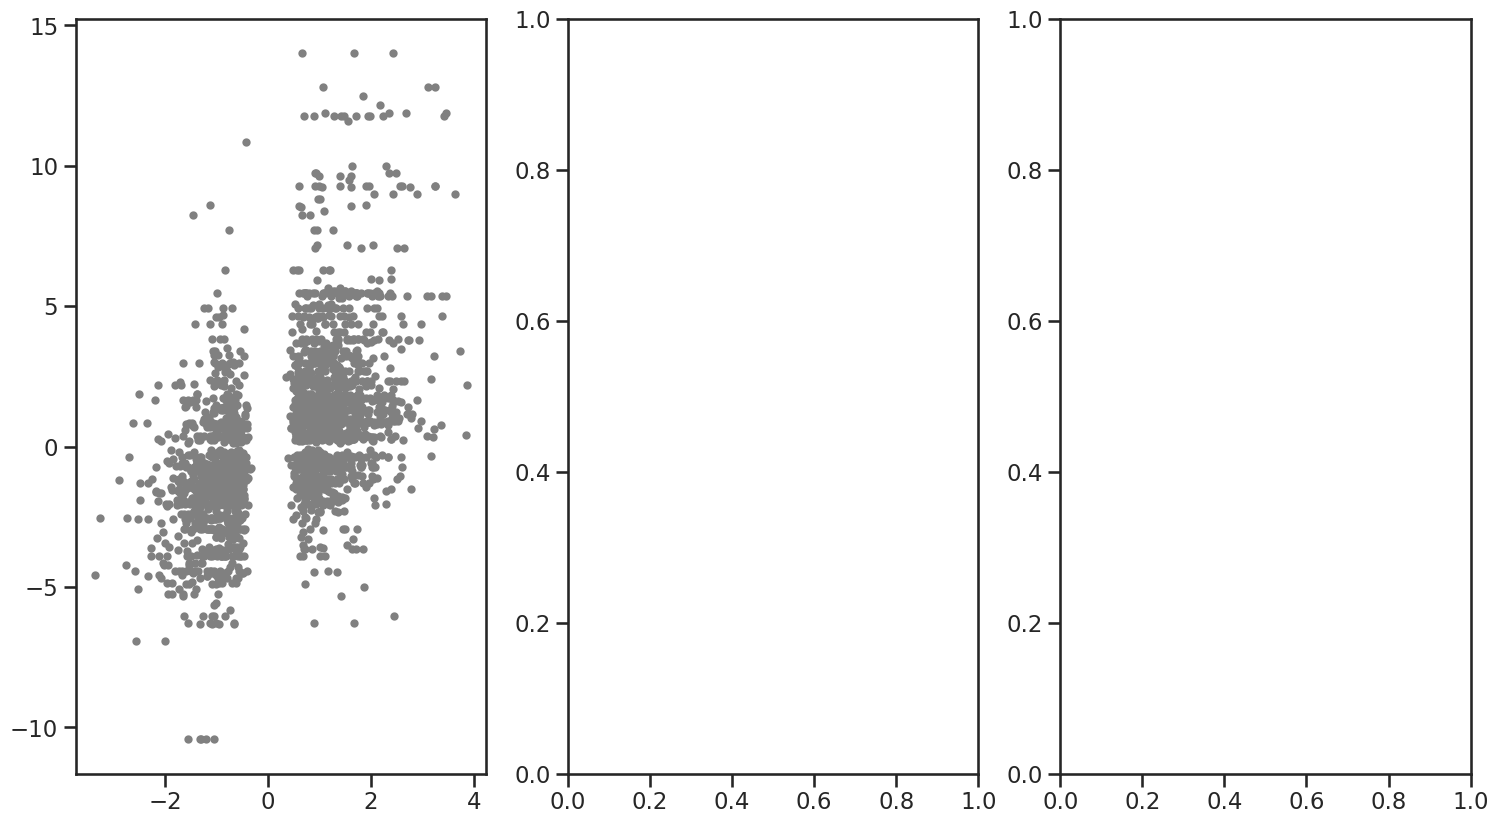

In [124]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import seaborn as sns
import numpy as np
%matplotlib inline

from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt 

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = "\u03C1" # u'\u03C1'
    ax.annotate('%s = %.2f' % (rho, r), xy=(1, 1), xycoords=ax.transAxes)
    
#plt.rcParams['pdf.fonttype'] = 42
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("talk", font_scale=1)
plt.rcParams.update({'figure.figsize':(15,8), 'figure.dpi':100})

fig, ax = plt.subplots(1, 3, figsize=(18,10))

ax1 = ax.flatten()[0]
points = ax1.scatter(
    ATAC_RNA.loc[np.abs(ATAC_RNA.distance)<3000, 'ATAC_log2FoldChange'], 
    ATAC_RNA.loc[np.abs(ATAC_RNA.distance)<3000, 'RNA_log2FoldChange'],
    color='gray', marker='o', s=20, label='All hits')

for x, y, t in zip(
    ATAC_RNA_spGenes.loc[np.abs(ATAC_RNA_spGenes.distance)<3000, 'ATAC_log2FoldChange'],
    ATAC_RNA_spGenes.loc[np.abs(ATAC_RNA_spGenes.distance)<3000, 'RNA_log2FoldChange'], 
    ATAC_RNA_spGenes.loc[np.abs(ATAC_RNA_spGenes.distance)<3000, 'genes']) :
    ax1.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=15)

ax1.scatter(ATAC_RNA_spGenes.loc[np.abs(ATAC_RNA_spGenes.distance)<3000, 'ATAC_log2FoldChange'], 
    ATAC_RNA_spGenes.loc[np.abs(ATAC_RNA_spGenes.distance)<3000, 'RNA_log2FoldChange'], marker='o', s=20, color='blue', label='Genes of Interest')


corrfunc(
    ATAC_RNA.loc[np.abs(ATAC_RNA.distance)<3000, 'ATAC_log2FoldChange'], 
    ATAC_RNA.loc[np.abs(ATAC_RNA.distance)<3000, 'RNA_log2FoldChange'],
    ax=ax1, method='spearman')

ax1.set_xlim(ax1.get_xlim())
ax1.set_ylim(ax1.get_ylim())
ax1.vlines(0, ax1.get_ylim()[0], ax1.get_ylim()[1], color='#5A5959', linestyle='--')
ax1.hlines(0, ax1.get_xlim()[0], ax1.get_xlim()[1], color='#5A5959', linestyle='--')
ax1.set_xlabel('ATAC_log2FC')
ax1.set_ylabel('RNA log2FC')
ax1.set_title('Promoters (<3kb)')


ax2 = ax.flatten()[1]
points = ax2.scatter(
    ATAC_RNA.loc[np.abs(ATAC_RNA.distance)>=3000, 'ATAC_log2FoldChange'], 
    ATAC_RNA.loc[np.abs(ATAC_RNA.distance)>=3000, 'RNA_log2FoldChange'],
    color='gray', marker='o', s=20, label='All hits')

for x, y, t in zip(
    ATAC_RNA_spGenes.loc[np.abs(ATAC_RNA_spGenes.distance)>=3000, 'ATAC_log2FoldChange'],
    ATAC_RNA_spGenes.loc[np.abs(ATAC_RNA_spGenes.distance)>=3000, 'RNA_log2FoldChange'], 
    ATAC_RNA_spGenes.loc[np.abs(ATAC_RNA_spGenes.distance)>=3000, 'genes']) :
    ax2.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=15)
    
ax2.scatter(ATAC_RNA_spGenes.loc[np.abs(ATAC_RNA_spGenes.distance)>=3000, 'ATAC_log2FoldChange'], 
    ATAC_RNA_spGenes.loc[np.abs(ATAC_RNA_spGenes.distance)>=3000, 'RNA_log2FoldChange'], marker='o', s=20, color='blue', label='Genes of Interest')
corrfunc(
    ATAC_RNA.loc[np.abs(ATAC_RNA.distance)>=3000, 'ATAC_log2FoldChange'], 
    ATAC_RNA.loc[np.abs(ATAC_RNA.distance)>=3000, 'RNA_log2FoldChange'],
    ax=ax2, method='spearman')

ax2.set_xlim(ax2.get_xlim())
ax2.set_ylim(ax2.get_ylim())
ax2.vlines(0, ax2.get_ylim()[0], ax2.get_ylim()[1], color='#5A5959', linestyle='--')
ax2.hlines(0, ax2.get_xlim()[0], ax2.get_xlim()[1], color='#5A5959', linestyle='--')
ax2.set_xlabel('ATAC log2FC')
ax2.set_ylabel('RNA log2FC')
ax2.set_title('Distal (>=3kb)')


ax3 = ax.flatten()[2]
points = ax3.scatter(
    ATAC_RNA.loc[:, 'ATAC_log2FoldChange'], 
    ATAC_RNA.loc[:, 'RNA_log2FoldChange'],
    color='gray', marker='o', s=20, label='All hits')

for x, y, t in zip(
    ATAC_RNA_spGenes.loc[:, 'ATAC_log2FoldChange'],
    ATAC_RNA_spGenes.loc[:, 'RNA_log2FoldChange'], 
    ATAC_RNA_spGenes.loc[:, 'genes']) :
    ax3.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=15)
    
ax3.scatter(ATAC_RNA_spGenes.loc[:, 'ATAC_log2FoldChange'], 
    ATAC_RNA_spGenes.loc[:, 'RNA_log2FoldChange'], marker='o', s=20, color='blue', label='Genes of Interest')
corrfunc(
    ATAC_RNA.loc[:, 'ATAC_log2FoldChange'], 
    ATAC_RNA.loc[:, 'RNA_log2FoldChange'],
    ax=ax3, method='spearman')

ax3.set_xlim(ax3.get_xlim())
ax3.set_ylim(ax3.get_ylim())
ax3.vlines(0, ax3.get_ylim()[0], ax3.get_ylim()[1], color='#5A5959', linestyle='--')
ax3.hlines(0, ax3.get_xlim()[0], ax3.get_xlim()[1], color='#5A5959', linestyle='--')
ax3.set_xlabel('ATAC log2FC')
ax3.set_ylabel('RNA log2FC')
ax3.set_title('All Peaks')

# cbar = fig.colorbar(points)
# cbar.set_label('abs. distance to closest TSS', rotation=270)

sns.despine(fig,ax)
plt.tight_layout()
plt.show()

Take the Green region (ATACseq peaks) from the Venn diagram (the peaks that do not intersect with the ASTARRseq) and identify the nearest genes (~60kb) in the nearby regions. Filter out the top genes from the list with the top logFC values

In [19]:
import pandas as pd

ASTARR_ATAC = pd.read_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/Th17_ASTARR_ATAC_subset.txt', sep='\t', names=['chr_start_end','ASTARR_log2FoldChange','ATAC_log2FoldChange'])
ATAC_hits =pd.read_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/Th17_ATAC_hits.bed', sep='\t', names=['chr','start','end','baseMean','ATAC_log2FoldChange','lfcSE','pvalue','padj','chr_start_end'])

ATAC_not_ASTARR = ATAC_hits.loc[~ATAC_hits.chr_start_end.isin(ASTARR_ATAC.chr_start_end)]
ATAC_not_ASTARR.drop(columns = ['chr','start','end','baseMean','lfcSE','pvalue','padj'], inplace=True)
ATAC_not_ASTARR = ATAC_not_ASTARR[['chr_start_end','ATAC_log2FoldChange']]
ATAC_not_ASTARR.to_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/ATAC_peaks_notin_ASTARR_peaks.txt', sep='\t', index=False, header=False)



In [20]:
%%bash
cd /data/reddylab/Revathy/dev/Keith/data/integrative/
sbatch -pnew,all \
    --cpus-per-task 1 \
    --mem 8G \
    -o /data/reddylab/Revathy/dev/Keith/data/integrative/logs/ATAC_peaks_notin_ASTARR_peaks_annotation.out \
    <<'EOF'
#!/bin/bash
SAMPLE="ATAC_peaks_notin_ASTARR_peaks.txt"

tail -n+2 ${SAMPLE} \
| cut -f1 \
| awk -F_ -vOFS="\t" '{print $1, $2, $3, $1"_"$2"_"$3}' \
| sort -k1,1 -k2,2n \
| bedtools closest \
    -nonamecheck \
    -D a \
    -a - \
    -b /data/reddylab/Revathy/dev/Keith/data/gencode.vM19.basic.annotation.TSS.bed \
| awk -vOFS="\t" \
    '{if(last==$4){genes=$11","genes;}else{if(genes){print peak, genes, distance}peak=$4; genes=$11; distance=$13; last=peak}}END{if(last==$4){genes=$11","genes;print peak, genes, distance}}' \
> ${SAMPLE/.txt/.closest_gene.txt}

EOF

Submitted batch job 25060168


In [59]:
import numpy as np
with_genes = pd.read_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/ATAC_peaks_notin_ASTARR_peaks.closest_gene.txt', sep='\t', names=['chr_start_end','GeneName','distance'])
with_genes

ATAC_not_ASTARR_with_genes = ATAC_not_ASTARR.merge(with_genes, on='chr_start_end', how='inner')
top_ATAC_not_ASTARR_with_genes = ATAC_not_ASTARR_with_genes[np.abs(ATAC_not_ASTARR_with_genes.distance)<60000].sort_values(by='ATAC_log2FoldChange', ascending=False)

RNA_with_genes = pd.read_csv('/data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/differential_testing/deseq2/timeseries/Th17.Sorted.72hr_vs_mmTh0.Sorted.72hr.with_genes_padjFiltered0.01.txt', sep='\t')
RNA_with_genes.drop(columns = ['Unnamed: 0','Unnamed: 0.1','baseMean','lfcSE','pvalue','padj','GeneType'], inplace=True)
RNA_with_genes.rename(columns = {'log2FoldChange':'RNA_log2FoldChange'}, inplace=True)
RNA_with_genes = RNA_with_genes[['GeneName','RNA_log2FoldChange']]


In [66]:
top_ATAC_not_ASTARR_with_genes

,chr_start_end,ATAC_log2FoldChange,GeneName,distance
20,chr1_20725668_20726173,4.867676,Il17a,4731
366,chr9_52181306_52181591,4.843806,Zc3h12c,-12735
8,chr1_60930469_60930920,4.809106,Ctla4,-21446
73,chr14_60340657_60340936,4.685900,Amer2,32322
78,chr11_70720671_70720906,4.534444,Kif1c,-20125
...,...,...,...,...
1834,chr3_109335982_109336437,-4.513404,Vav3,4215
355,chr1_53197502_53198542,-4.662423,1700019A02Rik,-9867
633,chr10_30627415_30627991,-4.691306,Hint3,-8937
2631,chr5_117466998_117467357,-5.200202,Ksr2,-53000


In [62]:
top_ATAC_not_ASTARR_with_genes_RNA = top_ATAC_not_ASTARR_with_genes.merge(RNA_with_genes, on='GeneName',how='inner')

sig_genes = ['Maf', 'Il17a', 'Rorc', 'Stat3', 'Stat5', 'Batf', 'Irf4', 'Runx1', 'Il21r', 'Tbx21', 'Foxp3']
top_ATAC_not_ASTARR_with_genes_RNA_spGenes = top_ATAC_not_ASTARR_with_genes_RNA[top_ATAC_not_ASTARR_with_genes_RNA['GeneName'].isin(sig_genes)]


,chr_start_end,ATAC_log2FoldChange,GeneName,distance,RNA_log2FoldChange
0,chr1_20725668_20726173,4.867676,Il17a,4731,10.610688
1,chr1_20736639_20737028,1.378935,Il17a,-5736,10.610688
2,chr1_20754482_20754885,1.266345,Il17a,-23579,10.610688
3,chr1_20752478_20752860,1.228604,Il17a,-21575,10.610688
4,chr1_20740397_20740959,0.440019,Il17a,-9494,10.610688
1457,chr12_85710836_85711195,1.951361,Batf,-24169,0.637650
1458,chr12_85704773_85706228,0.501442,Batf,-18106,0.637650
1459,chr12_85686242_85688285,-0.242595,Batf,0,0.637650
1460,chr12_85670006_85670375,-0.781356,Batf,16293,0.637650
1461,chr12_85663022_85663290,-0.939260,Batf,23378,0.637650


In [72]:
top_ATAC_not_ASTARR_with_genes_RNA[(np.abs(top_ATAC_not_ASTARR_with_genes_RNA.distance)>=3000)].sort_values(by=['RNA_log2FoldChange','ATAC_log2FoldChange'], ascending=False).head(25)


,chr_start_end,ATAC_log2FoldChange,GeneName,distance,RNA_log2FoldChange
244,chr17_79715094_79716102,1.162663,Cyp1b1,-54,14.246579
245,chr17_79713291_79714301,0.396348,Cyp1b1,740,14.246579
4073,chr3_37229225_37229885,1.118966,Il21,2733,13.208127
26,chr13_56609331_56609707,1.061844,Tgfbi,0,12.653597
97,chr6_67488743_67489095,1.236325,Il23r,2760,11.632752
3993,chr1_130886252_130886874,1.213911,Il24,580,11.516563
43,chr12_70346262_70347905,0.373463,Trim9,0,9.963492
173,chr1_143640676_143641208,1.393411,B3galt2,-14,9.535434
6110,chr17_62881502_62884464,0.792945,Efna5,-186,9.533088
6753,chr1_131022399_131023255,-0.362549,Il10,-2556,9.360537


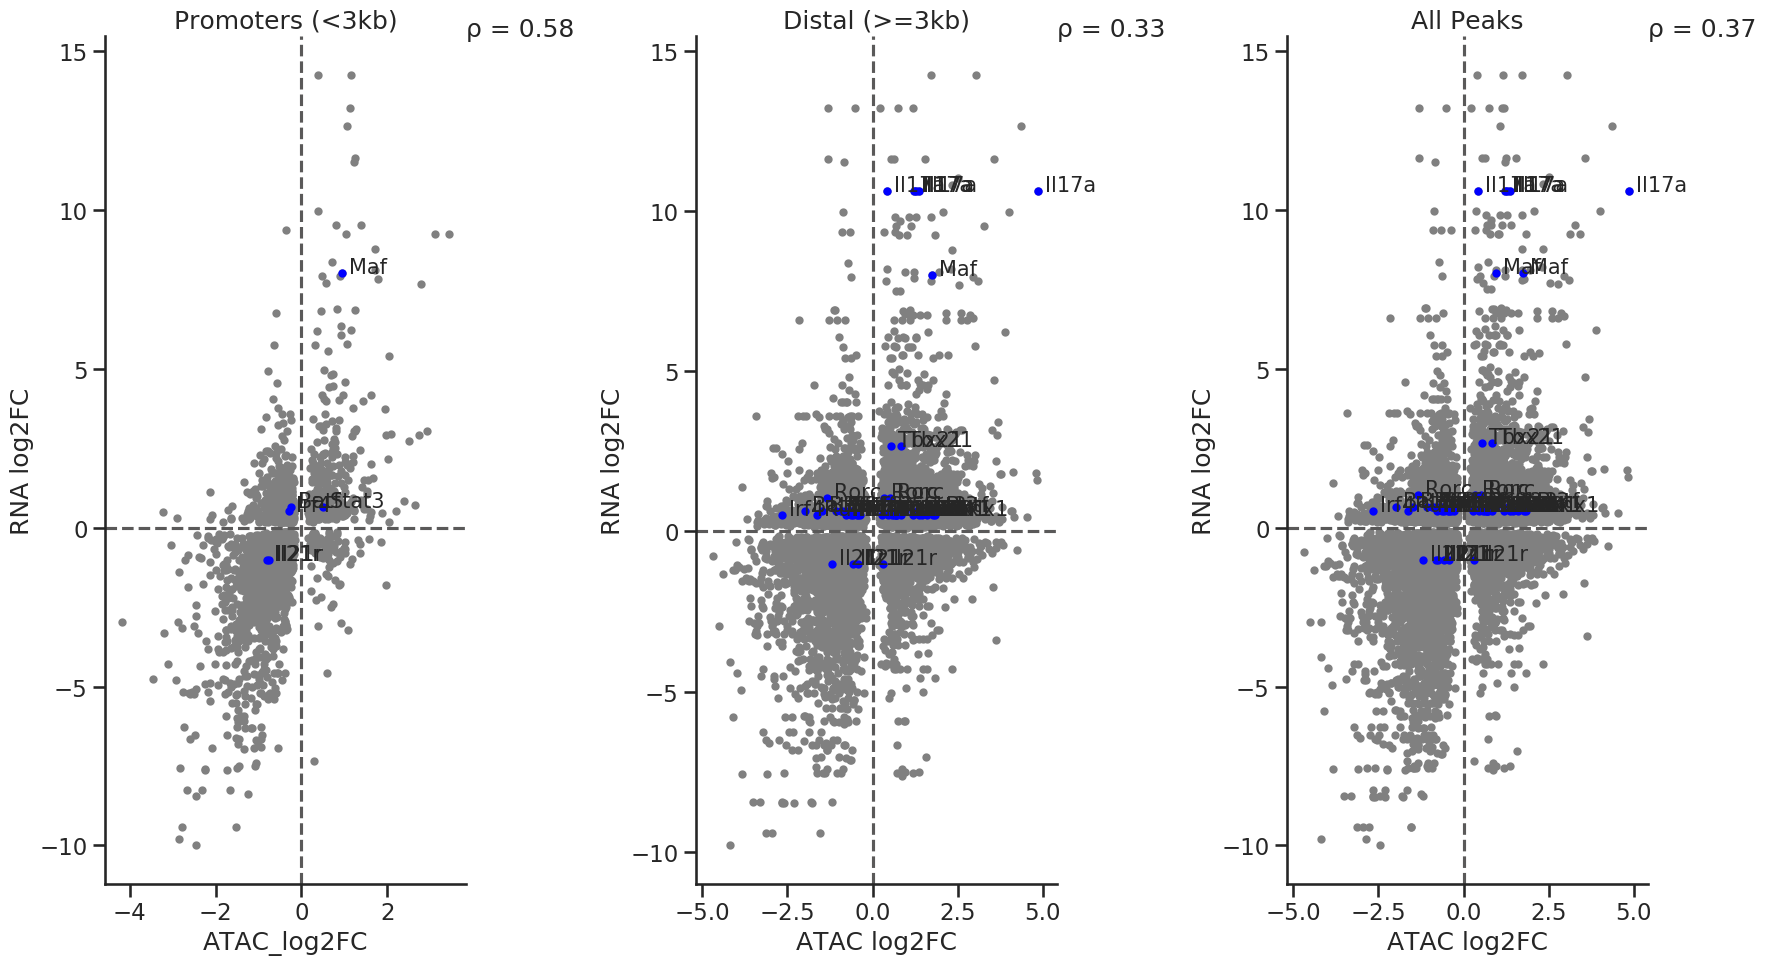

In [65]:
### Scatterplot for promoter(<3kb), distal(>=3kb) and all regions for ATACseq vs ASTARRseq

import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import seaborn as sns
import numpy as np
%matplotlib inline

from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt 

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = "\u03C1" # u'\u03C1'
    ax.annotate('%s = %.2f' % (rho, r), xy=(1, 1), xycoords=ax.transAxes)
    
#plt.rcParams['pdf.fonttype'] = 42
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("talk", font_scale=1)
plt.rcParams.update({'figure.figsize':(15,8), 'figure.dpi':100})

fig, ax = plt.subplots(1, 3, figsize=(18,10))

ax1 = ax.flatten()[0]
points = ax1.scatter(
    top_ATAC_not_ASTARR_with_genes_RNA.loc[np.abs(top_ATAC_not_ASTARR_with_genes_RNA.distance)<3000, 'ATAC_log2FoldChange'], 
    top_ATAC_not_ASTARR_with_genes_RNA.loc[np.abs(top_ATAC_not_ASTARR_with_genes_RNA.distance)<3000, 'RNA_log2FoldChange'],
    color='gray', marker='o', s=20, label='All hits')

for x, y, t in zip(
    top_ATAC_not_ASTARR_with_genes_RNA_spGenes.loc[np.abs(top_ATAC_not_ASTARR_with_genes_RNA_spGenes.distance)<3000, 'ATAC_log2FoldChange'],
    top_ATAC_not_ASTARR_with_genes_RNA_spGenes.loc[np.abs(top_ATAC_not_ASTARR_with_genes_RNA_spGenes.distance)<3000, 'RNA_log2FoldChange'], 
    top_ATAC_not_ASTARR_with_genes_RNA_spGenes.loc[np.abs(top_ATAC_not_ASTARR_with_genes_RNA_spGenes.distance)<3000, 'GeneName']) :
    ax1.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=15)

ax1.scatter(top_ATAC_not_ASTARR_with_genes_RNA_spGenes.loc[np.abs(top_ATAC_not_ASTARR_with_genes_RNA_spGenes.distance)<3000, 'ATAC_log2FoldChange'], 
    top_ATAC_not_ASTARR_with_genes_RNA_spGenes.loc[np.abs(top_ATAC_not_ASTARR_with_genes_RNA_spGenes.distance)<3000, 'RNA_log2FoldChange'], marker='o', s=20, color='blue', label='Genes of Interest')

corrfunc(
    top_ATAC_not_ASTARR_with_genes_RNA.loc[np.abs(top_ATAC_not_ASTARR_with_genes_RNA.distance)<3000, 'ATAC_log2FoldChange'], 
    top_ATAC_not_ASTARR_with_genes_RNA.loc[np.abs(top_ATAC_not_ASTARR_with_genes_RNA.distance)<3000, 'RNA_log2FoldChange'],
    ax=ax1, method='spearman')

ax1.set_xlim(ax1.get_xlim())
ax1.set_ylim(ax1.get_ylim())
ax1.vlines(0, ax1.get_ylim()[0], ax1.get_ylim()[1], color='#5A5959', linestyle='--')
ax1.hlines(0, ax1.get_xlim()[0], ax1.get_xlim()[1], color='#5A5959', linestyle='--')
ax1.set_xlabel('ATAC_log2FC')
ax1.set_ylabel('RNA log2FC')
ax1.set_title('Promoters (<3kb)')


ax2 = ax.flatten()[1]
points = ax2.scatter(
    top_ATAC_not_ASTARR_with_genes_RNA.loc[np.abs(top_ATAC_not_ASTARR_with_genes_RNA.distance)>=3000, 'ATAC_log2FoldChange'], 
    top_ATAC_not_ASTARR_with_genes_RNA.loc[np.abs(top_ATAC_not_ASTARR_with_genes_RNA.distance)>=3000, 'RNA_log2FoldChange'],
    color='gray', marker='o', s=20, label='All hits')

for x, y, t in zip(
    top_ATAC_not_ASTARR_with_genes_RNA_spGenes.loc[np.abs(top_ATAC_not_ASTARR_with_genes_RNA_spGenes.distance)>=3000, 'ATAC_log2FoldChange'],
    top_ATAC_not_ASTARR_with_genes_RNA_spGenes.loc[np.abs(top_ATAC_not_ASTARR_with_genes_RNA_spGenes.distance)>=3000, 'RNA_log2FoldChange'], 
    top_ATAC_not_ASTARR_with_genes_RNA_spGenes.loc[np.abs(top_ATAC_not_ASTARR_with_genes_RNA_spGenes.distance)>=3000, 'GeneName']) :
    ax2.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=15)
    
ax2.scatter(top_ATAC_not_ASTARR_with_genes_RNA_spGenes.loc[np.abs(top_ATAC_not_ASTARR_with_genes_RNA_spGenes.distance)>=3000, 'ATAC_log2FoldChange'], 
    top_ATAC_not_ASTARR_with_genes_RNA_spGenes.loc[np.abs(top_ATAC_not_ASTARR_with_genes_RNA_spGenes.distance)>=3000, 'RNA_log2FoldChange'], marker='o', s=20, color='blue', label='Genes of Interest')
corrfunc(
    top_ATAC_not_ASTARR_with_genes_RNA.loc[np.abs(top_ATAC_not_ASTARR_with_genes_RNA.distance)>=3000, 'ATAC_log2FoldChange'], 
    top_ATAC_not_ASTARR_with_genes_RNA.loc[np.abs(top_ATAC_not_ASTARR_with_genes_RNA.distance)>=3000, 'RNA_log2FoldChange'],
    ax=ax2, method='spearman')

ax2.set_xlim(ax2.get_xlim())
ax2.set_ylim(ax2.get_ylim())
ax2.vlines(0, ax2.get_ylim()[0], ax2.get_ylim()[1], color='#5A5959', linestyle='--')
ax2.hlines(0, ax2.get_xlim()[0], ax2.get_xlim()[1], color='#5A5959', linestyle='--')
ax2.set_xlabel('ATAC log2FC')
ax2.set_ylabel('RNA log2FC')
ax2.set_title('Distal (>=3kb)')


ax3 = ax.flatten()[2]
points = ax3.scatter(
    top_ATAC_not_ASTARR_with_genes_RNA.loc[:, 'ATAC_log2FoldChange'], 
    top_ATAC_not_ASTARR_with_genes_RNA.loc[:, 'RNA_log2FoldChange'],
    color='gray', marker='o', s=20, label='All hits')

for x, y, t in zip(
    top_ATAC_not_ASTARR_with_genes_RNA_spGenes.loc[:, 'ATAC_log2FoldChange'],
    top_ATAC_not_ASTARR_with_genes_RNA_spGenes.loc[:, 'RNA_log2FoldChange'], 
    top_ATAC_not_ASTARR_with_genes_RNA_spGenes.loc[:, 'GeneName']) :
    ax3.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=15)
    
ax3.scatter(top_ATAC_not_ASTARR_with_genes_RNA_spGenes.loc[:, 'ATAC_log2FoldChange'], 
    top_ATAC_not_ASTARR_with_genes_RNA_spGenes.loc[:, 'RNA_log2FoldChange'], marker='o', s=20, color='blue', label='Genes of Interest')
corrfunc(
    top_ATAC_not_ASTARR_with_genes_RNA.loc[:, 'ATAC_log2FoldChange'], 
    top_ATAC_not_ASTARR_with_genes_RNA.loc[:, 'RNA_log2FoldChange'],
    ax=ax3, method='spearman')

ax3.set_xlim(ax3.get_xlim())
ax3.set_ylim(ax3.get_ylim())
ax3.vlines(0, ax3.get_ylim()[0], ax3.get_ylim()[1], color='#5A5959', linestyle='--')
ax3.hlines(0, ax3.get_xlim()[0], ax3.get_xlim()[1], color='#5A5959', linestyle='--')
ax3.set_xlabel('ATAC log2FC')
ax3.set_ylabel('RNA log2FC')
ax3.set_title('All Peaks')

# cbar = fig.colorbar(points)
# cbar.set_label('abs. distance to closest TSS', rotation=270)

sns.despine(fig,ax)
plt.tight_layout()
plt.show()

#### 4/19-Next Steps

- [ ] Overlay ASTARR peaks in co-ordinate plot between ATACseq and RNAseq(DE genes common between Maria and Keith's data). Will be interesting to see how many peaks overlap and how many peaks are filtered out from the set of ~5000 common peaks when using the DE genelist with 960 genes. 
- [ ] Create co-ordinate plots for the peaks from just the ASTARRseq in comparison with the RNAseq DE genes

Overlay ASTARR peaks in co-ordinate plot between ATACseq and RNAseq(DE genes common between Maria and Keith's data). Will be interesting to see how many peaks overlap and how many peaks are filtered out from the set of ~5000 common peaks when using the DE genelist with 960 genes. 

In [11]:
import pandas as pd

RNA_ATAC_ASTARR = pd.read_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/Th17_RNA_ATAC_ASTARR_with_genes.txt', sep='\t')
RNA_ATAC_ASTARR.drop(columns='Unnamed: 0', inplace=True)
Keith_Ciofani = pd.read_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/Th17_Keith_Ciofani_combined_RNA_DE_genes.txt', sep='\t')
Keith_Ciofani.rename(columns={'genes':'GeneName'}, inplace=True)
Keith_Ciofani.drop(columns='Unnamed: 0', inplace=True)
RNA_ATAC_ASTARR.shape


(2912, 6)

In [12]:
Keith_Ciofani_RNA_ATAC_ASTARR = RNA_ATAC_ASTARR[RNA_ATAC_ASTARR['GeneName'].isin(Keith_Ciofani.GeneName)]
Keith_Ciofani_RNA_ATAC_ASTARR

,chr_start_end,ASTARR_log2FoldChange,ATAC_log2FoldChange,RNA_log2FoldChange,GeneName,distance
2,chr3_37213303_37213537,0.853785,2.948243,13.208127,Il21,19081
3,chr3_37218953_37219529,-0.524473,1.194538,13.208127,Il21,13089
4,chr3_37231146_37231407,0.536181,1.896756,13.208127,Il21,1211
6,chr6_67491457_67492168,0.541403,1.971575,11.632752,Il23r,0
8,chr1_20740397_20740902,0.918622,0.440019,10.610688,Il17a,-9494
...,...,...,...,...,...,...
2893,chr1_161734374_161735238,0.646285,-0.980888,-4.762553,Fasl,53257
2894,chr1_161766700_161767479,0.507932,-1.061178,-4.762553,Fasl,21016
2895,chr6_128888482_128889192,0.729414,-0.459028,-4.778218,Clec2i,-896
2902,chr15_74671924_74672883,-0.743163,-0.642689,-5.246401,Arc,0


In [13]:
sig_genes = ['Maf', 'Il17a', 'Rorc', 'Stat3', 'Stat5', 'Batf', 'Irf4', 'Runx1', 'Il21r', 'Tbx21', 'Foxp3']
Keith_Ciofani_RNA_ATAC_ASTARR_sp_genes = Keith_Ciofani_RNA_ATAC_ASTARR[Keith_Ciofani_RNA_ATAC_ASTARR.GeneName.isin(sig_genes)]
Keith_Ciofani_RNA_ATAC_ASTARR_sp_genes

,chr_start_end,ASTARR_log2FoldChange,ATAC_log2FoldChange,RNA_log2FoldChange,GeneName,distance
8,chr1_20740397_20740902,0.918622,0.440019,10.610688,Il17a,-9494
28,chr8_115274091_115275131,0.421344,2.239136,8.005572,Maf,432663
29,chr8_115385508_115386209,0.542027,2.853646,8.005572,Maf,321585
30,chr8_115494359_115494700,1.193081,2.176352,8.005572,Maf,213094
31,chr8_115397623_115398415,0.634552,0.405460,8.005572,Maf,309379
534,chr3_94375844_94377546,-0.442939,0.513308,1.032588,Rorc,-3052
881,chr11_100938823_100940205,0.328166,0.499867,0.649945,Stat3,0
882,chr11_100904751_100905305,2.201249,1.297113,0.649945,Stat3,34235
1083,chr13_30832953_30833848,0.553348,-0.405480,0.526010,Irf4,-83729
1084,chr13_30830946_30831669,1.288904,-0.222426,0.526010,Irf4,-81722


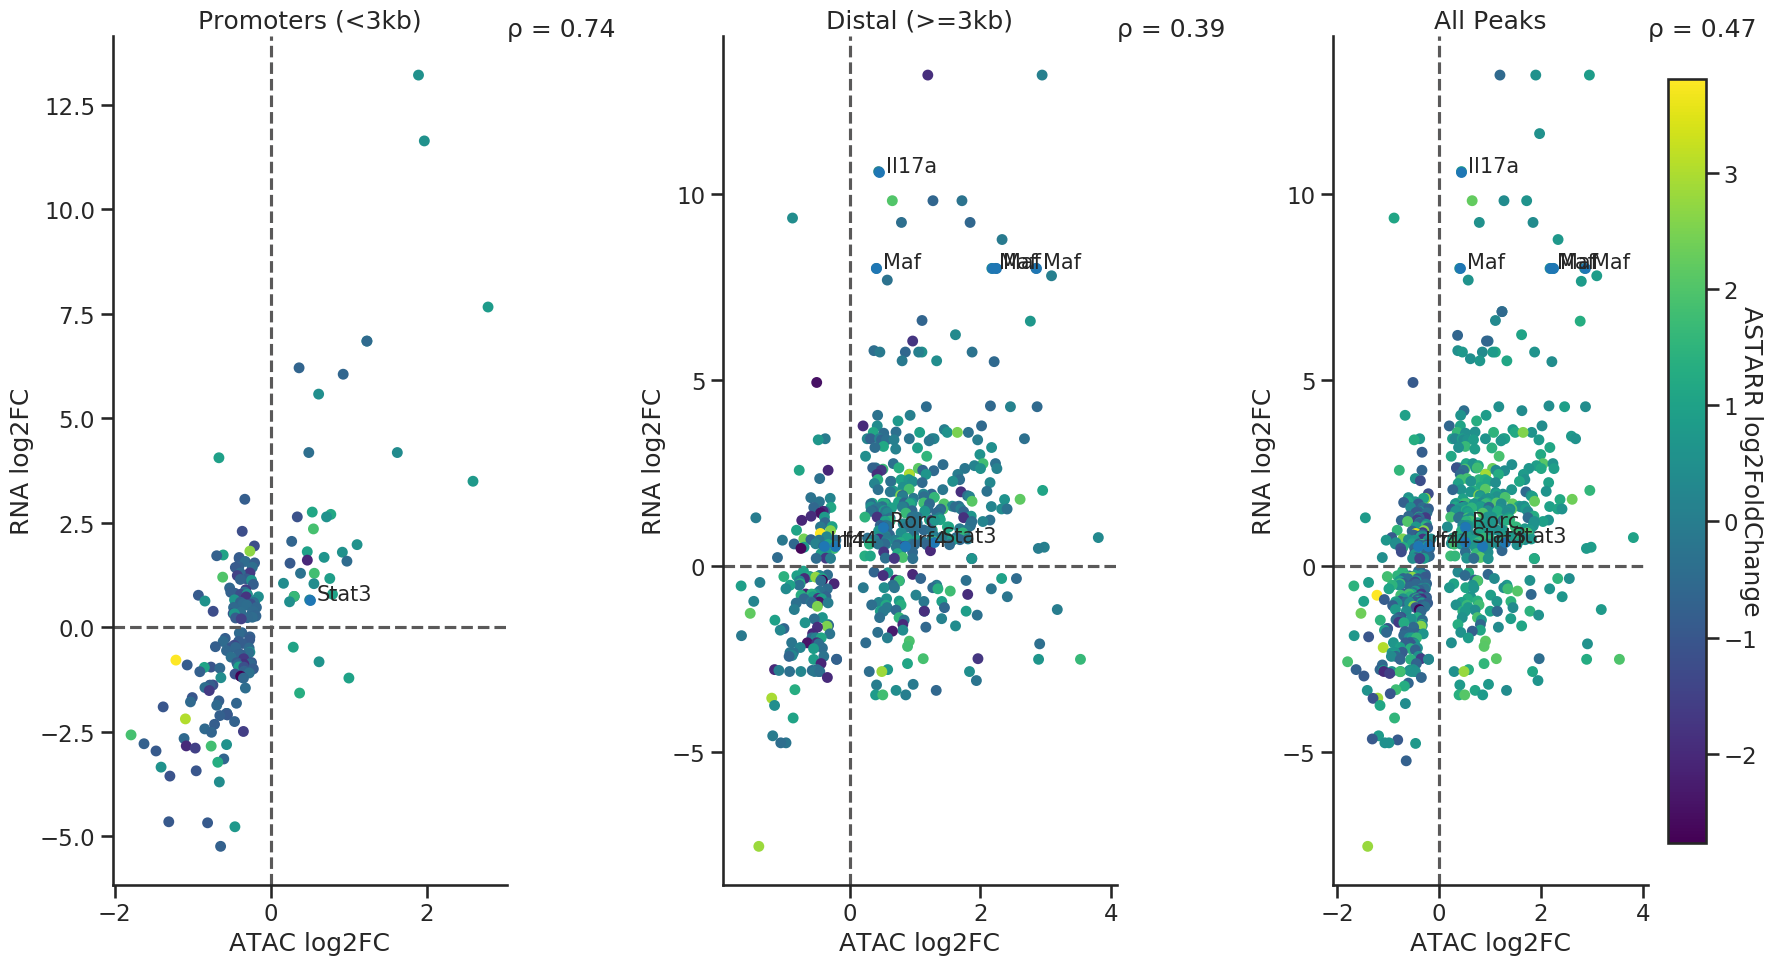

In [15]:
### Scatterplot for promoter(<3kb), distal(>=3kb) and all regions for ATACseq vs ASTARRseq

import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import seaborn as sns
import numpy as np
%matplotlib inline

from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt 

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = "\u03C1" # u'\u03C1'
    ax.annotate('%s = %.2f' % (rho, r), xy=(1, 1), xycoords=ax.transAxes)
    
#plt.rcParams['pdf.fonttype'] = 42
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("talk", font_scale=1)
plt.rcParams.update({'figure.figsize':(15,8), 'figure.dpi':100})

fig, ax = plt.subplots(1, 3, figsize=(18,10))

ax1 = ax.flatten()[0]
points = ax1.scatter(
    Keith_Ciofani_RNA_ATAC_ASTARR.loc[np.abs(Keith_Ciofani_RNA_ATAC_ASTARR.distance)<3000, 'ATAC_log2FoldChange'], 
    Keith_Ciofani_RNA_ATAC_ASTARR.loc[np.abs(Keith_Ciofani_RNA_ATAC_ASTARR.distance)<3000, 'RNA_log2FoldChange'],
    c=Keith_Ciofani_RNA_ATAC_ASTARR.loc[np.abs(Keith_Ciofani_RNA_ATAC_ASTARR.distance)<3000, 'ASTARR_log2FoldChange'],
    cmap='viridis', marker='o', s=40, label='All hits')

for x, y, t in zip(
    Keith_Ciofani_RNA_ATAC_ASTARR_sp_genes.loc[np.abs(Keith_Ciofani_RNA_ATAC_ASTARR_sp_genes.distance)<3000, 'ATAC_log2FoldChange'],
    Keith_Ciofani_RNA_ATAC_ASTARR_sp_genes.loc[np.abs(Keith_Ciofani_RNA_ATAC_ASTARR_sp_genes.distance)<3000, 'RNA_log2FoldChange'], 
    Keith_Ciofani_RNA_ATAC_ASTARR_sp_genes.loc[np.abs(Keith_Ciofani_RNA_ATAC_ASTARR_sp_genes.distance)<3000, 'GeneName']) :
    ax1.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=15)

ax1.scatter(Keith_Ciofani_RNA_ATAC_ASTARR_sp_genes.loc[np.abs(Keith_Ciofani_RNA_ATAC_ASTARR_sp_genes.distance)<3000, 'ATAC_log2FoldChange'], 
    Keith_Ciofani_RNA_ATAC_ASTARR_sp_genes.loc[np.abs(Keith_Ciofani_RNA_ATAC_ASTARR_sp_genes.distance)<3000, 'RNA_log2FoldChange'], marker='o', s=40)

corrfunc(
    Keith_Ciofani_RNA_ATAC_ASTARR.loc[np.abs(Keith_Ciofani_RNA_ATAC_ASTARR.distance)<3000, 'ATAC_log2FoldChange'], 
    Keith_Ciofani_RNA_ATAC_ASTARR.loc[np.abs(Keith_Ciofani_RNA_ATAC_ASTARR.distance)<3000, 'RNA_log2FoldChange'],
    ax=ax1, method='spearman')

ax1.set_xlim(ax1.get_xlim())
ax1.set_ylim(ax1.get_ylim())
ax1.vlines(0, ax1.get_ylim()[0], ax1.get_ylim()[1], color='#5A5959', linestyle='--')
ax1.hlines(0, ax1.get_xlim()[0], ax1.get_xlim()[1], color='#5A5959', linestyle='--')
ax1.set_xlabel('ATAC log2FC')
ax1.set_ylabel('RNA log2FC')
ax1.set_title('Promoters (<3kb)')


ax2 = ax.flatten()[1]
points = ax2.scatter(
    Keith_Ciofani_RNA_ATAC_ASTARR.loc[np.abs(Keith_Ciofani_RNA_ATAC_ASTARR.distance)>=3000, 'ATAC_log2FoldChange'], 
    Keith_Ciofani_RNA_ATAC_ASTARR.loc[np.abs(Keith_Ciofani_RNA_ATAC_ASTARR.distance)>=3000, 'RNA_log2FoldChange'],
    c=Keith_Ciofani_RNA_ATAC_ASTARR.loc[np.abs(Keith_Ciofani_RNA_ATAC_ASTARR.distance)>=3000, 'ASTARR_log2FoldChange'],
    cmap='viridis', marker='o', s=40, label='All hits')

for x, y, t in zip(
    Keith_Ciofani_RNA_ATAC_ASTARR_sp_genes.loc[np.abs(Keith_Ciofani_RNA_ATAC_ASTARR_sp_genes.distance)>=3000, 'ATAC_log2FoldChange'],
    Keith_Ciofani_RNA_ATAC_ASTARR_sp_genes.loc[np.abs(Keith_Ciofani_RNA_ATAC_ASTARR_sp_genes.distance)>=3000, 'RNA_log2FoldChange'], 
    Keith_Ciofani_RNA_ATAC_ASTARR_sp_genes.loc[np.abs(Keith_Ciofani_RNA_ATAC_ASTARR_sp_genes.distance)>=3000, 'GeneName']) :
    ax2.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=15)
    
ax2.scatter(Keith_Ciofani_RNA_ATAC_ASTARR_sp_genes.loc[np.abs(Keith_Ciofani_RNA_ATAC_ASTARR_sp_genes.distance)>=3000, 'ATAC_log2FoldChange'], 
    Keith_Ciofani_RNA_ATAC_ASTARR_sp_genes.loc[np.abs(Keith_Ciofani_RNA_ATAC_ASTARR_sp_genes.distance)>=3000, 'RNA_log2FoldChange'], marker='o', s=40)

corrfunc(
    Keith_Ciofani_RNA_ATAC_ASTARR.loc[np.abs(Keith_Ciofani_RNA_ATAC_ASTARR.distance)>=3000, 'ATAC_log2FoldChange'], 
    Keith_Ciofani_RNA_ATAC_ASTARR.loc[np.abs(Keith_Ciofani_RNA_ATAC_ASTARR.distance)>=3000, 'RNA_log2FoldChange'],
    ax=ax2, method='spearman')

ax2.set_xlim(ax2.get_xlim())
ax2.set_ylim(ax2.get_ylim())
ax2.vlines(0, ax2.get_ylim()[0], ax2.get_ylim()[1], color='#5A5959', linestyle='--')
ax2.hlines(0, ax2.get_xlim()[0], ax2.get_xlim()[1], color='#5A5959', linestyle='--')
ax2.set_xlabel('ATAC log2FC')
ax2.set_ylabel('RNA log2FC')
ax2.set_title('Distal (>=3kb)')


ax3 = ax.flatten()[2]
points = ax3.scatter(
    Keith_Ciofani_RNA_ATAC_ASTARR.loc[:, 'ATAC_log2FoldChange'], 
    Keith_Ciofani_RNA_ATAC_ASTARR.loc[:, 'RNA_log2FoldChange'],
    c=Keith_Ciofani_RNA_ATAC_ASTARR.loc[:, 'ASTARR_log2FoldChange'],
    cmap='viridis', marker='o', s=40, label='All hits')

for x, y, t in zip(
    Keith_Ciofani_RNA_ATAC_ASTARR_sp_genes.loc[:, 'ATAC_log2FoldChange'],
    Keith_Ciofani_RNA_ATAC_ASTARR_sp_genes.loc[:, 'RNA_log2FoldChange'], 
    Keith_Ciofani_RNA_ATAC_ASTARR_sp_genes.loc[:, 'GeneName']) :
    ax3.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=15)
    
ax3.scatter(Keith_Ciofani_RNA_ATAC_ASTARR_sp_genes.loc[:, 'ATAC_log2FoldChange'], 
    Keith_Ciofani_RNA_ATAC_ASTARR_sp_genes.loc[:, 'RNA_log2FoldChange'], marker='o', s=40)

corrfunc(
    Keith_Ciofani_RNA_ATAC_ASTARR.loc[:, 'ATAC_log2FoldChange'], 
    Keith_Ciofani_RNA_ATAC_ASTARR.loc[:, 'RNA_log2FoldChange'],
    ax=ax3, method='spearman')

ax3.set_xlim(ax3.get_xlim())
ax3.set_ylim(ax3.get_ylim())
ax3.vlines(0, ax3.get_ylim()[0], ax3.get_ylim()[1], color='#5A5959', linestyle='--')
ax3.hlines(0, ax3.get_xlim()[0], ax3.get_xlim()[1], color='#5A5959', linestyle='--')
ax3.set_xlabel('ATAC log2FC')
ax3.set_ylabel('RNA log2FC')
ax3.set_title('All Peaks')

cbar = fig.colorbar(points, shrink=0.9)
cbar.set_label('ASTARR log2FoldChange', rotation=270)

sns.despine(fig,ax)
plt.tight_layout()
plt.show()

In [133]:
ATAC_RNA = pd.read_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/Th17_RNA_Keith_Ciofani_ATAC_3024peaks.txt', sep='\t')
ATAC_RNA_filtered = ATAC_RNA.drop(columns=['RNA_log2FoldChange','padj'])
ATAC_RNA_filtered[['chr','start','end']] = ATAC_RNA_filtered.chr_start_end.str.split("_",expand=True)
ATAC_RNA_filtered = ATAC_RNA_filtered[['chr','start','end','ATAC_log2FoldChange','chr_start_end','genes','distance']]
ATAC_RNA_filtered.to_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/Th17_RNA_Keith_Ciofani_ATAC_3024peaks.bed', sep='\t', index=False, header=None)
ATAC_RNA_filtered

,chr,start,end,ATAC_log2FoldChange,chr_start_end,genes,distance
0,chr1,20713869,20714975,2.262002,chr1_20713869_20714975,Il17a,15930
1,chr1,20724060,20724322,2.155470,chr1_20724060_20724322,Il17a,6583
2,chr1,20725380,20726472,3.575553,chr1_20725380_20726472,Il17a,4433
3,chr1,20730599,20731850,3.099332,chr1_20730599_20731850,Il17a,0
4,chr1,20734688,20735422,3.241870,chr1_20734688_20735422,Il17a,-193
...,...,...,...,...,...,...,...
3037,chr9,14754444,14755284,1.353763,chr9_14754444_14755284,Fut4,-2052
3038,chr7,24461142,24463316,0.376649,chr7_24461142_24463316,Plaur,0
3039,chr7,24470072,24470824,0.969227,chr7_24470072_24470824,Plaur,0
3040,chr19,38811942,38812759,1.397304,chr19_38811942_38812759,Noc3l,0


In [134]:
ATAC_RNA

,chr_start_end,genes,ATAC_log2FoldChange,RNA_log2FoldChange,padj,distance
0,chr1_20713869_20714975,Il17a,2.262002,12.795124,4.314722e-14,15930
1,chr1_20724060_20724322,Il17a,2.155470,12.795124,4.533092e-06,6583
2,chr1_20725380_20726472,Il17a,3.575553,12.795124,1.245350e-76,4433
3,chr1_20730599_20731850,Il17a,3.099332,12.795124,4.932535e-78,0
4,chr1_20734688_20735422,Il17a,3.241870,12.795124,1.764830e-36,-193
...,...,...,...,...,...,...
3037,chr9_14754444_14755284,Fut4,1.353763,-0.617851,7.794093e-15,-2052
3038,chr7_24461142_24463316,Plaur,0.376649,-0.414537,7.111717e-03,0
3039,chr7_24470072_24470824,Plaur,0.969227,-0.414537,9.241488e-05,0
3040,chr19_38811942_38812759,Noc3l,1.397304,0.111219,1.641304e-07,0


In [45]:
ASTARR_ATAC_genes_log_values = pd.read_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/Th17_ASTARR_ATAC_gene_log_values.txt', sep='\t')
ASTARR_ATAC_genes_log_values.drop(columns=['ATAC_log2FoldChange','distance'], inplace=True)
ASTARR_ATAC_genes_log_values[['chr','start','end']] = ASTARR_ATAC_genes_log_values.chr_start_end.str.split("_",expand=True)
ASTARR_ATAC_genes_log_values = ASTARR_ATAC_genes_log_values[['chr','start','end','ASTARR_log2FoldChange','chr_start_end','GeneName']]
ASTARR_ATAC_genes_log_values.to_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/ASTARR_ATAC_genes_log_values.bed', sep='\t', index=False, header=None)
ASTARR_ATAC_genes_log_values

,chr,start,end,ASTARR_log2FoldChange,chr_start_end,GeneName
0,chr1,10231604,10233415,-0.957627,chr1_10231604_10233415,Arfgef1
1,chr1,105373847,105374370,0.406599,chr1_105373847_105374370,Rnf152
2,chr1,105971611,105972123,3.383456,chr1_105971611_105972123,Zcchc2
3,chr1,106127803,106128051,0.522160,chr1_106127803_106128051,Phlpp1
4,chr1,106171171,106172053,-0.440310,chr1_106171171_106172053,Phlpp1
...,...,...,...,...,...,...
5267,chrX,8892347,8893330,-1.215767,chrX_8892347_8893330,B630019K06Rik
5268,chrX,9272135,9273162,-0.822313,chrX_9272135_9273162,Xk
5269,chrX,94233522,94234893,-0.757658,chrX_94233522_94234893,Klhl15
5270,chrX,95993035,95993645,1.156051,chrX_95993035_95993645,Las1l


In [135]:
%%bash
module load bedtools2
bedtools intersect \
-a /data/reddylab/Revathy/dev/Keith/data/integrative/Th17_RNA_Keith_Ciofani_ATAC_3024peaks.bed \
-b /data/reddylab/Revathy/dev/Keith/data/integrative/KS151_Th17ASTARR_hits.bed \
-wa \
-wb \
> /data/reddylab/Revathy/dev/Keith/data/integrative/Th17_Keith_Ciofani_ASTARR_ATAC_intersect.txt

***** WARNING: File /data/reddylab/Revathy/dev/Keith/data/integrative/KS151_Th17ASTARR_hits.bed has inconsistent naming convention for record:
GL456216.1	15775	17386	4501.88330979452	0.650408560528825	0.100209277981723	1.14156318720311e-11	1.42464878230619e-10	GL456216.1_15775_17386

***** WARNING: File /data/reddylab/Revathy/dev/Keith/data/integrative/KS151_Th17ASTARR_hits.bed has inconsistent naming convention for record:
GL456216.1	15775	17386	4501.88330979452	0.650408560528825	0.100209277981723	1.14156318720311e-11	1.42464878230619e-10	GL456216.1_15775_17386



In [149]:
!wc -l /data/reddylab/Revathy/dev/Keith/data/integrative/Th17_Keith_Ciofani_ASTARR_ATAC_intersect.txt

322 /data/reddylab/Revathy/dev/Keith/data/integrative/Th17_Keith_Ciofani_ASTARR_ATAC_intersect.txt


In [137]:
%%bash
cat /data/reddylab/Revathy/dev/Keith/data/integrative/Th17_Keith_Ciofani_ASTARR_ATAC_intersect.txt \
| awk -vOFS='\t' '{print $1, $2<$9?$2:$9, $3<$10?$3:$10, $0}' > /data/reddylab/Revathy/dev/Keith/data/integrative/Th17_Keith_Ciofani_ASTARR_ATAC_intersect_filtered.txt



In [138]:
!head /data/reddylab/Revathy/dev/Keith/data/integrative/Th17_Keith_Ciofani_ASTARR_ATAC_intersect_filtered.txt

chr1	20730599	20731089	chr1	20730599	20731850	3.099331668416009	chr1_20730599_20731850	Il17a	0	chr1	20730780	20731089	633.769647275355	1.13006216548196	0.141719253952901	5.13538711797109e-17	1.00792482761149e-15	chr1_20730780_20731089
chr12	54191227	54192194	chr12	54191227	54192697	0.4866316641762561	chr12_54191227_54192697	Egln3	0	chr12	54191941	54192194	387.14517144387	0.504957329323468	0.159052460906053	0.000347430893326849	0.00152118518161843	chr12_54191941_54192194
chr12	54210408	54211117	chr12	54210408	54211436	1.997235264468889	chr12_54210408_54211436	Egln3	-6549	chr12	54210707	54211117	1148.56258092709	1.17485311039657	0.140813510088676	2.52458811887222e-18	5.45449228753668e-17	chr12_54210707_54211117
chr12	98267961	98270674	chr12	98267961	98271131	0.578525257167357	chr12_98267961_98271131	Gpr65	0	chr12	98269783	98270674	3558.39306972769	0.980976819661778	0.0942710253150663	8.18381295438698e-27	2.84805490611542e-25	chr12_98269783_98270674
chr13	45687379	45687937	chr13	45687379	

In [1]:
import pandas as pd
import numpy as np

Keith_Ciofani_ASTARR_ATAC_intersect = pd.read_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/Th17_Keith_Ciofani_ASTARR_ATAC_intersect_filtered.txt', sep='\t', header=None, index_col=False,
                                                 names = ['chr','start','end',
                                                          'ATAC_chr','ATAC_start','ATAC_end','ATAC_log2FoldChange','ATAC_chr_start_end','ATAC_genes','distance',
                                                          'ASTARR_chr','ASTARR_start','ASTARR_end','ASTARR_baseMean','ASTARR_log2FoldChange','ASTARR_lfcSE','ASTARR_pvalue','ASTARR_padj','ASTARR_chr_start_end'])
Keith_Ciofani_ASTARR_ATAC_intersect['chr_start_end'] = Keith_Ciofani_ASTARR_ATAC_intersect['chr'] + '_' + Keith_Ciofani_ASTARR_ATAC_intersect['start'].astype(str) + '_' + Keith_Ciofani_ASTARR_ATAC_intersect['end'].astype(str)
#Keith_Ciofani_ASTARR_ATAC_intersect ['GeneName'] = Keith_Ciofani_ASTARR_ATAC_intersect['ATAC_genes'] + ', ' + Keith_Ciofani_ASTARR_ATAC_intersect['ASTARR_genes']
Keith_Ciofani_ASTARR_ATAC_intersect = Keith_Ciofani_ASTARR_ATAC_intersect[['chr_start_end','ATAC_log2FoldChange','ASTARR_log2FoldChange','ATAC_genes','distance']]
Keith_Ciofani_ASTARR_ATAC_intersect.rename(columns={'ATAC_genes':'genes'}, inplace=True)

# condition = [
#     (Keith_Ciofani_ASTARR_ATAC_intersect['ATAC_genes'] == Keith_Ciofani_ASTARR_ATAC_intersect['ASTARR_genes']),
#     (Keith_Ciofani_ASTARR_ATAC_intersect['ATAC_genes'] != Keith_Ciofani_ASTARR_ATAC_intersect['ASTARR_genes'])
# ]
# value = [Keith_Ciofani_ASTARR_ATAC_intersect['ATAC_genes'], Keith_Ciofani_ASTARR_ATAC_intersect['ATAC_genes']+', '+Keith_Ciofani_ASTARR_ATAC_intersect['ASTARR_genes']]

# Keith_Ciofani_ASTARR_ATAC_intersect['GeneName'] = np.select(condition, value)
Keith_Ciofani_ASTARR_ATAC_intersect

,chr_start_end,ATAC_log2FoldChange,ASTARR_log2FoldChange,genes,distance
0,chr1_20730599_20731089,3.099332,1.130062,Il17a,0
1,chr12_54191227_54192194,0.486632,0.504957,Egln3,0
2,chr12_54210408_54211117,1.997235,1.174853,Egln3,-6549
3,chr12_98267961_98270674,0.578525,0.980977,Gpr65,0
4,chr13_45687379_45687937,-1.059955,1.693978,Atxn1,0
...,...,...,...,...,...
317,chr18_7452157_7452587,1.204286,0.891598,Mpp7,0
318,chr18_7558942_7559776,2.385007,0.792261,Mpp7,0
319,chr11_84123141_84123532,2.013224,0.727873,Tada2a,0
320,chr3_95725885_95726180,1.228070,1.098682,Ecm1,6845


In [4]:
Ciofani_RNA_ATAC_ASTARR = Keith_Ciofani_ASTARR_ATAC_intersect.merge(Keith_Ciofani, on='genes', how='inner')
sig_genes = ['Maf', 'Il17a', 'Rorc', 'Stat3', 'Stat5', 'Batf', 'Irf4', 'Runx1', 'Il21r', 'Tbx21', 'Foxp3']
Ciofani_RNA_ATAC_ASTARR_spGenes = Ciofani_RNA_ATAC_ASTARR[Ciofani_RNA_ATAC_ASTARR['genes'].isin(sig_genes)]

In [50]:
max(Ciofani_RNA_ATAC_ASTARR.ASTARR_log2FoldChange)

3.5317337637262303

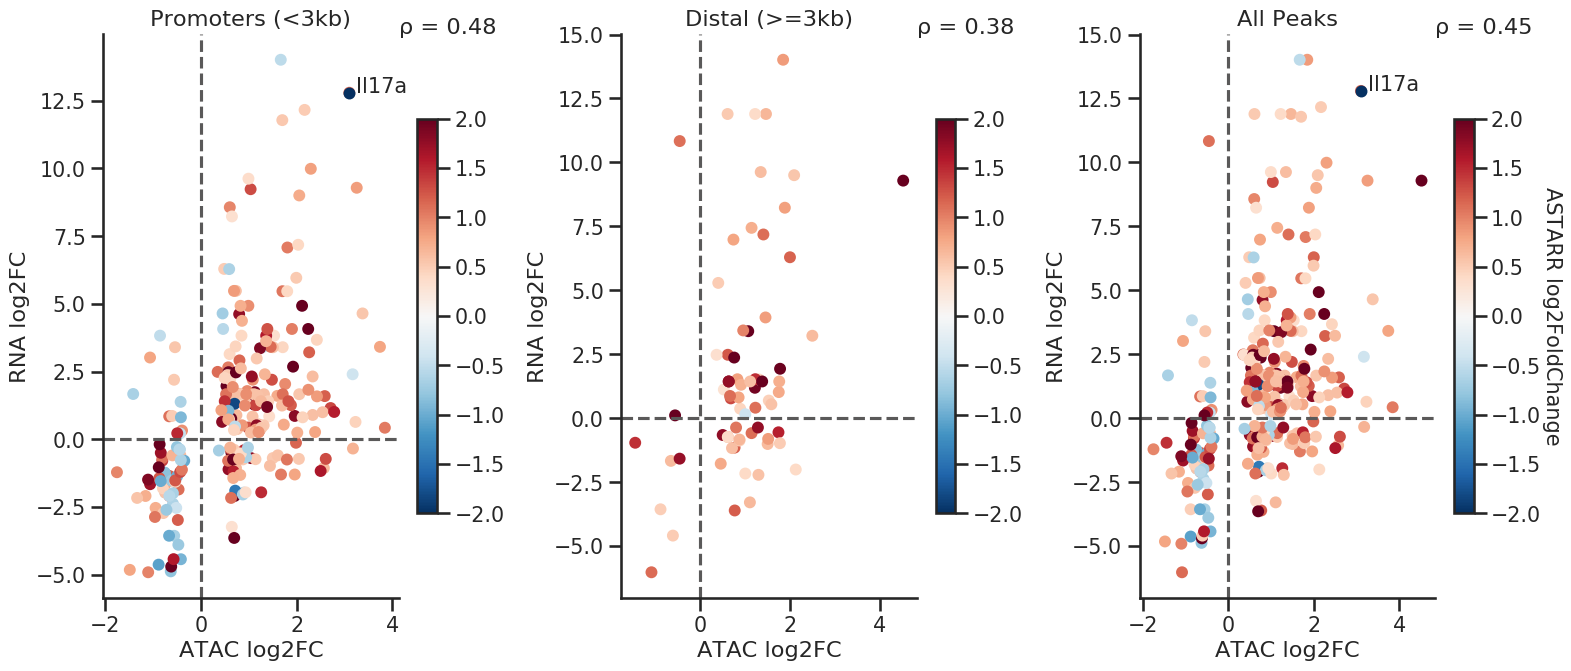

In [13]:
### Scatterplot for promoter(<3kb), distal(>=3kb) and all regions for ATACseq vs ASTARRseq

import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import seaborn as sns
import numpy as np
%matplotlib inline

from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt 

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = "\u03C1" # u'\u03C1'
    ax.annotate('%s = %.2f' % (rho, r), xy=(1, 1), xycoords=ax.transAxes)
    
#plt.rcParams['pdf.fonttype'] = 42
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("talk", font_scale=0.9)
plt.rcParams.update({'figure.figsize':(16,7), 'figure.dpi':100})

fig, ax = plt.subplots(1, 3)

ax1 = ax.flatten()[0]
points = ax1.scatter(
    Ciofani_RNA_ATAC_ASTARR.loc[np.abs(Ciofani_RNA_ATAC_ASTARR.distance)<3000, 'ATAC_log2FoldChange'], 
    Ciofani_RNA_ATAC_ASTARR.loc[np.abs(Ciofani_RNA_ATAC_ASTARR.distance)<3000, 'RNA_log2FoldChange'],
    c=Ciofani_RNA_ATAC_ASTARR.loc[np.abs(Ciofani_RNA_ATAC_ASTARR.distance)<3000, 'ASTARR_log2FoldChange'],
    cmap='RdBu_r', marker='o', s=50, label='All hits')

for x, y, t in zip(
    Ciofani_RNA_ATAC_ASTARR_spGenes.loc[np.abs(Ciofani_RNA_ATAC_ASTARR_spGenes.distance)<3000, 'ATAC_log2FoldChange'],
    Ciofani_RNA_ATAC_ASTARR_spGenes.loc[np.abs(Ciofani_RNA_ATAC_ASTARR_spGenes.distance)<3000, 'RNA_log2FoldChange'], 
    Ciofani_RNA_ATAC_ASTARR_spGenes.loc[np.abs(Ciofani_RNA_ATAC_ASTARR_spGenes.distance)<3000, 'genes']) :
    ax1.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=15)

ax1.scatter(
    Ciofani_RNA_ATAC_ASTARR_spGenes.loc[np.abs(Ciofani_RNA_ATAC_ASTARR_spGenes.distance)<3000, 'ATAC_log2FoldChange'], 
    Ciofani_RNA_ATAC_ASTARR_spGenes.loc[np.abs(Ciofani_RNA_ATAC_ASTARR_spGenes.distance)<3000, 'RNA_log2FoldChange'],
    c=Ciofani_RNA_ATAC_ASTARR_spGenes.loc[np.abs(Ciofani_RNA_ATAC_ASTARR_spGenes.distance)<3000, 'ASTARR_log2FoldChange'],
    cmap='RdBu_r', marker='o', s=50)

corrfunc(
    Ciofani_RNA_ATAC_ASTARR.loc[np.abs(Ciofani_RNA_ATAC_ASTARR.distance)<3000, 'ATAC_log2FoldChange'], 
    Ciofani_RNA_ATAC_ASTARR.loc[np.abs(Ciofani_RNA_ATAC_ASTARR.distance)<3000, 'RNA_log2FoldChange'],
    ax=ax1, method='spearman')

ax1.set_xlim(ax1.get_xlim())
ax1.set_ylim(ax1.get_ylim())
ax1.vlines(0, ax1.get_ylim()[0], ax1.get_ylim()[1], color='#5A5959', linestyle='--')
ax1.hlines(0, ax1.get_xlim()[0], ax1.get_xlim()[1], color='#5A5959', linestyle='--')
ax1.set_xlabel('ATAC log2FC')
ax1.set_ylabel('RNA log2FC')
ax1.set_title('Promoters (<3kb)')

cbar = fig.colorbar(points, shrink=0.7, ax=ax1)
#cbar.set_label('ASTARR log2FoldChange', rotation=270, labelpad=15, fontsize=15)
cbar.mappable.set_clim(-2,2)

ax2 = ax.flatten()[1]
points = ax2.scatter(
    Ciofani_RNA_ATAC_ASTARR.loc[np.abs(Ciofani_RNA_ATAC_ASTARR.distance)>=3000, 'ATAC_log2FoldChange'], 
    Ciofani_RNA_ATAC_ASTARR.loc[np.abs(Ciofani_RNA_ATAC_ASTARR.distance)>=3000, 'RNA_log2FoldChange'],
    c=Ciofani_RNA_ATAC_ASTARR.loc[np.abs(Ciofani_RNA_ATAC_ASTARR.distance)>=3000, 'ASTARR_log2FoldChange'],
    cmap='RdBu_r', marker='o', s=50, label='All hits')

for x, y, t in zip(
    Ciofani_RNA_ATAC_ASTARR_spGenes.loc[np.abs(Ciofani_RNA_ATAC_ASTARR_spGenes.distance)>=3000, 'ATAC_log2FoldChange'],
    Ciofani_RNA_ATAC_ASTARR_spGenes.loc[np.abs(Ciofani_RNA_ATAC_ASTARR_spGenes.distance)>=3000, 'RNA_log2FoldChange'], 
    Ciofani_RNA_ATAC_ASTARR_spGenes.loc[np.abs(Ciofani_RNA_ATAC_ASTARR_spGenes.distance)>=3000, 'genes']) :
    ax2.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=15)
    
ax2.scatter(
    Ciofani_RNA_ATAC_ASTARR_spGenes.loc[np.abs(Ciofani_RNA_ATAC_ASTARR_spGenes.distance)>=3000, 'ATAC_log2FoldChange'], 
    Ciofani_RNA_ATAC_ASTARR_spGenes.loc[np.abs(Ciofani_RNA_ATAC_ASTARR_spGenes.distance)>=3000, 'RNA_log2FoldChange'],
    c=Ciofani_RNA_ATAC_ASTARR_spGenes.loc[np.abs(Ciofani_RNA_ATAC_ASTARR_spGenes.distance)>=3000, 'ASTARR_log2FoldChange'],
    cmap='RdBu_r', marker='o', s=50)

corrfunc(
    Ciofani_RNA_ATAC_ASTARR.loc[np.abs(Ciofani_RNA_ATAC_ASTARR.distance)>=3000, 'ATAC_log2FoldChange'], 
    Ciofani_RNA_ATAC_ASTARR.loc[np.abs(Ciofani_RNA_ATAC_ASTARR.distance)>=3000, 'RNA_log2FoldChange'],
    ax=ax2, method='spearman')

ax2.set_xlim(ax2.get_xlim())
ax2.set_ylim(ax2.get_ylim())
ax2.vlines(0, ax2.get_ylim()[0], ax2.get_ylim()[1], color='#5A5959', linestyle='--')
ax2.hlines(0, ax2.get_xlim()[0], ax2.get_xlim()[1], color='#5A5959', linestyle='--')
ax2.set_xlabel('ATAC log2FC')
ax2.set_ylabel('RNA log2FC')
ax2.set_title('Distal (>=3kb)')

cbar = fig.colorbar(points, shrink=0.7, ax=ax2)
#cbar.set_label('ASTARR log2FoldChange', rotation=270, labelpad=15, fontsize=15)
cbar.mappable.set_clim(-2,2)

ax3 = ax.flatten()[2]
points = ax3.scatter(
    Ciofani_RNA_ATAC_ASTARR.loc[:, 'ATAC_log2FoldChange'], 
    Ciofani_RNA_ATAC_ASTARR.loc[:, 'RNA_log2FoldChange'],
    c=Ciofani_RNA_ATAC_ASTARR.loc[:, 'ASTARR_log2FoldChange'],
    cmap='RdBu_r', marker='o', s=50, label='All hits')

for x, y, t in zip(
    Ciofani_RNA_ATAC_ASTARR_spGenes.loc[:, 'ATAC_log2FoldChange'],
    Ciofani_RNA_ATAC_ASTARR_spGenes.loc[:, 'RNA_log2FoldChange'], 
    Ciofani_RNA_ATAC_ASTARR_spGenes.loc[:, 'genes']) :
    ax3.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=15)
    
ax3.scatter(
    Ciofani_RNA_ATAC_ASTARR_spGenes.loc[:, 'ATAC_log2FoldChange'], 
    Ciofani_RNA_ATAC_ASTARR_spGenes.loc[:, 'RNA_log2FoldChange'],
    c=Ciofani_RNA_ATAC_ASTARR_spGenes.loc[:, 'ASTARR_log2FoldChange'],
    cmap='RdBu_r', marker='o', s=50)

corrfunc(
    Ciofani_RNA_ATAC_ASTARR.loc[:, 'ATAC_log2FoldChange'], 
    Ciofani_RNA_ATAC_ASTARR.loc[:, 'RNA_log2FoldChange'],
    ax=ax3, method='spearman')

ax3.set_xlim(ax3.get_xlim())
ax3.set_ylim(ax3.get_ylim())
ax3.vlines(0, ax3.get_ylim()[0], ax3.get_ylim()[1], color='#5A5959', linestyle='--')
ax3.hlines(0, ax3.get_xlim()[0], ax3.get_xlim()[1], color='#5A5959', linestyle='--')
ax3.set_xlabel('ATAC log2FC')
ax3.set_ylabel('RNA log2FC')
ax3.set_title('All Peaks')

cbar = fig.colorbar(points, shrink=0.7, ax=ax3)
cbar.set_label('ASTARR log2FoldChange', rotation=270, labelpad=15, fontsize=15)
cbar.mappable.set_clim(-2,2)

sns.despine(fig,ax)
plt.tight_layout()
plt.savefig('/data/reddylab/Revathy/dev/Keith/data/integrative/plots/Th17_commonDEgenes_Keith_Maria_ATAC_ASTARR_coordinate_plots.pdf')
plt.show()

In [148]:
Ciofani_RNA_ATAC_ASTARR[(np.abs(Ciofani_RNA_ATAC_ASTARR.distance)<3000)].sort_values(by=['RNA_log2FoldChange','ASTARR_log2FoldChange'], ascending=False).head(25)



,chr_start_end,ATAC_log2FoldChange,ASTARR_log2FoldChange,genes,distance,RNA_log2FoldChange
157,chr3_37218640_37219529,1.668422,-0.524473,Il21,1643,14.013043
0,chr1_20730599_20731089,3.099332,1.130062,Il17a,0,12.795124
229,chr11_106374202_106374838,2.166091,0.514467,Prr29,0,12.162162
224,chr6_67490449_67492258,1.700472,0.541403,Il23r,0,11.783879
234,chr10_86010931_86012145,2.295535,0.813388,Bpifc,0,9.987763
238,chr16_58714768_58715402,0.993605,0.368312,Gpr15,1778,9.622392
265,chr16_42300146_42300901,3.254220,0.837153,Gap43,0,9.287078
126,chr6_48844894_48845703,1.038912,1.310366,Tmem176a,0,9.233712
236,chr18_24717722_24718287,2.054794,0.738782,Fhod3,0,9.003034
138,chr6_135362228_135363044,0.603945,0.974359,Emp1,0,8.567544


#### Create co-ordinate plots for the peaks from just the ASTARRseq in comparison with the RNAseq DE genes

In [84]:
import pandas as pd

ASTARR_ATAC = pd.read_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/Th17_ASTARR_ATAC_subset.txt', sep='\t', names=['chr_start_end','ASTARR_log2FoldChange','ATAC_log2FoldChange'])
ASTARR_hits =pd.read_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/KS151_Th17ASTARR_hits.bed', sep='\t', names=['chr','start','end','baseMean','ASTARR_log2FoldChange','lfcSE','pvalue','padj','chr_start_end'])

ASTARR_not_ATAC = ASTARR_hits.loc[~ASTARR_hits.chr_start_end.isin(ASTARR_ATAC.chr_start_end)]


all ATAC with RNA DE genes in the 60kb region. Then overlay with significant ASTARR peaks

In [2]:
import pandas as pd
ATAC = pd.read_csv('/data/reddylab/Revathy/dev/atac-seq_Siklenka/results/deseq2/Th17.72hrs.ASTARR.insert_vs_Th0.72hrs.ASTARR.insert.txt', sep='\t')
ATAC.index.names = ['chr_start_end']
ATAC.reset_index(inplace = True)
ATAC[['chr','start','end']] = ATAC.chr_start_end.str.split("_",expand=True)
#ATAC.drop(columns = 'chr_start_end', inplace=True)
ATAC_hits = ATAC[['chr', 'start', 'end', 'baseMean', 'log2FoldChange', 'lfcSE', 'pvalue', 'padj', 'chr_start_end']]
ATAC_hits = ATAC_hits[ATAC_hits['padj'] < 0.01]
ATAC_hits_filtered = ATAC_hits[['chr_start_end']]
ATAC_hits_filtered.to_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/Th17_ATAC_hits_peaks.txt', sep='\t', index=False, header=None)


In [20]:
%%bash
cd /data/reddylab/Revathy/dev/Keith/data/integrative/
sbatch -pnew,all \
    --cpus-per-task 1 \
    --mem 8G \
    -o /data/reddylab/Revathy/dev/Keith/data/integrative/logs/Th17_ATAC_hits_peaks.out \
    <<'EOF'
#!/bin/bash
SAMPLE="Th17_ATAC_hits_peaks.txt"

tail -n+2 ${SAMPLE} \
| cut -f1 \
| awk -F_ -vOFS="\t" '{print $1, $2, $3, $1"_"$2"_"$3}' \
| sort -k1,1 -k2,2n \
| bedtools closest \
    -nonamecheck \
    -D a \
    -a - \
    -b /data/reddylab/Revathy/dev/Keith/data/gencode.vM19.basic.annotation.TSS.bed \
| awk -vOFS="\t" \
    '{if(last==$4){genes=$11","genes;}else{if(genes){print peak, genes, distance}peak=$4; genes=$11; distance=$13; last=peak}}END{if(last==$4){genes=$11","genes;print peak, genes, distance}}' \
> ${SAMPLE/.txt/.closest_gene.txt}

EOF

Submitted batch job 25312027


In [3]:
import pandas as pd

ATAC_hits_with_genes = pd.read_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/Th17_ATAC_hits_peaks.closest_gene.txt', sep='\t', names=['chr_start_end', 'GeneName', 'distance'])
ATAC_hits_with_genes_log = ATAC_hits.merge(ATAC_hits_with_genes, on='chr_start_end', how='inner')
ATAC_hits_with_genes_log = ATAC_hits_with_genes_log[['chr_start_end', 'log2FoldChange', 'GeneName', 'distance']]
ATAC_hits_with_genes_log

,chr_start_end,log2FoldChange,GeneName,distance
0,chr2_181099184_181100691,3.024437,Kcnq2,34609
1,chr17_24922249_24923127,4.247631,Mapk8ip3,13850
2,chr4_143288308_143289056,3.461799,Pdpn,10508
3,chr1_36965410_36966158,2.336686,Tmem131,-25589
4,chr12_70890857_70891634,4.147589,Actr10,46222
...,...,...,...,...
32998,chr18_6489413_6491297,-0.202882,Epc1,24811
32999,chr8_126867090_126868306,-0.177053,Tomm20,77538
33000,chr9_50616560_50617595,-0.269426,"Nkapd1,Pih1d2",0
33001,chr1_192752673_192753584,-0.392602,Hhat,17639


In [4]:
RNA_with_genes = pd.read_csv('/data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/differential_testing/deseq2/timeseries/Th17.Sorted.72hr_vs_mmTh0.Sorted.72hr.with_genes_padjFiltered0.01.txt', sep='\t')
RNA_with_genes = RNA_with_genes[['GeneName', 'log2FoldChange']]
RNA_with_genes

,GeneName,log2FoldChange
0,Il17a,10.610688
1,Il17f,9.242296
2,Il1r1,6.603334
3,Ccl20,10.800780
4,Atp2b4,3.365006
...,...,...
7639,Gm10698,0.653465
7640,Sec22c,0.264615
7641,Spata2,0.193665
7642,Gm29666,-0.705567


In [5]:
import numpy as np
ATAC_RNA_with_genes = ATAC_hits_with_genes_log.merge(RNA_with_genes, on='GeneName', how='inner')
ATAC_RNA_with_genes.rename(columns = {'log2FoldChange_x':'ATAC_log2FoldChange',
                                      'log2FoldChange_y':'RNA_log2FoldChange'}, inplace=True)
ATAC_RNA_with_genes_distance_filtered = ATAC_RNA_with_genes[np.abs(ATAC_RNA_with_genes['distance'])<60000].sort_values(by='ATAC_log2FoldChange', ascending=False)
ATAC_RNA_with_genes_distance_filtered[['chr','start','end']] = ATAC_RNA_with_genes_distance_filtered.chr_start_end.str.split("_",expand=True)
ATAC_RNA_with_genes_distance_filtered = ATAC_RNA_with_genes_distance_filtered[['chr','start','end', 'ATAC_log2FoldChange','RNA_log2FoldChange','GeneName','distance']]
ATAC_RNA_with_genes_distance_filtered.to_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/Th17_ATAC_RNA_distance_filtered.bed', sep='\t', index=False, header=False)
ATAC_RNA_with_genes_distance_filtered

,chr,start,end,ATAC_log2FoldChange,RNA_log2FoldChange,GeneName,distance
129,chr1,20725668,20726173,4.867676,10.610688,Il17a,4731
1656,chr9,52181306,52181591,4.843806,1.606904,Zc3h12c,-12735
16,chr1,60930469,60930920,4.809106,1.817004,Ctla4,-21446
432,chr11,70720671,70720906,4.534444,0.465811,Kif1c,-20125
3780,chr13,56601255,56601818,4.370301,12.653597,Tgfbi,7767
...,...,...,...,...,...,...,...
4323,chr3,109337955,109338282,-4.182842,-2.964556,Vav3,2370
10096,chr10,107318790,107319499,-4.185569,-9.797892,Lin7a,-47106
750,chr13,94327806,94328708,-4.395441,-1.325956,Ap3b1,30251
4320,chr3,109335982,109336437,-4.513404,-2.964556,Vav3,4215


Intersect ATAC_RNA with ASTARR hits 

In [6]:
ASTARR_hits = pd.read_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/KS151_Th17ASTARR_hits.txt', sep='\t')
ASTARR_hits = ASTARR_hits[['chr','start','end','log2FoldChange']]
ASTARR_hits.to_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/KS151_Th17ASTARR_hits.bed', sep='\t', header=False, index=True)
ASTARR_hits

,chr,start,end,log2FoldChange
0,chr1,100180131,100180357,-0.800018
1,chr1,10037898,10038211,0.490100
2,chr1,10039805,10040146,-1.009222
3,chr1,10232767,10233415,-0.957627
4,chr1,105373962,105374370,0.406599
...,...,...,...,...
9319,GL456392.1,22101,22758,-1.338258
9320,JH584304.1,26413,27148,0.995793
9321,JH584304.1,72137,73895,-0.749127
9322,JH584304.1,89017,91195,-1.020889


In [75]:
%%bash
module load bedtools2
bedtools intersect \
-a /data/reddylab/Revathy/dev/Keith/data/integrative/Th17_ATAC_RNA_distance_filtered.bed \
-b /data/reddylab/Revathy/dev/Keith/data/integrative/KS151_Th17ASTARR_hits.bed \
-wa \
-wb \
> /data/reddylab/Revathy/dev/Keith/data/integrative/Th17_ATAC_RNA_ASTARR_distance_filtered.txt

***** WARNING: File /data/reddylab/Revathy/dev/Keith/data/integrative/KS151_Th17ASTARR_hits.bed has inconsistent naming convention for record:
GL456216.1	15775	17386	4501.88330979452	0.650408560528825	0.100209277981723	1.14156318720311e-11	1.42464878230619e-10	GL456216.1_15775_17386

***** WARNING: File /data/reddylab/Revathy/dev/Keith/data/integrative/KS151_Th17ASTARR_hits.bed has inconsistent naming convention for record:
GL456216.1	15775	17386	4501.88330979452	0.650408560528825	0.100209277981723	1.14156318720311e-11	1.42464878230619e-10	GL456216.1_15775_17386



In [76]:
!head /data/reddylab/Revathy/dev/Keith/data/integrative/Th17_ATAC_RNA_ASTARR_distance_filtered.txt

chr13	56601255	56601818	4.37030113192486	12.6535968676007	Tgfbi	7767	chr13	56601201	56601855	1981.24061305742	1.10167859069687	0.0949863867995473	1.42554002587955e-32	6.32021958049203e-31	chr13_56601201_56601855
chr17	24922249	24923127	4.24763116641612	-0.589345234421398	Mapk8ip3	13850	chr17	24922267	24923020	2575.25812904241	0.793263791683205	0.09979537325542	1.20053924037965e-16	2.27891217096113e-15	chr17_24922267_24923020
chr12	70890857	70891634	4.147589455252049	0.4543204890648089	Actr10	46222	chr12	70890795	70891551	2361.33595672911	0.639601940930076	0.0918002467663023	4.58696368309219e-13	6.56308928396458e-12	chr12_70890795_70891551
chr12	51319831	51320112	3.81035945931036	0.761232479149737	G2e3	27948	chr12	51319719	51320049	660.653999135076	1.02757502438594	0.146187150303567	6.98844610943322e-14	1.07296517235202e-12	chr12_51319719_51320049
chr4	45135019	45135537	3.78874347448178	0.3925505721222179	Tomm5	-26906	chr4	45134856	45135375	1127.26672795936	0.446863600186643	0.125347884

In [77]:
%%bash
cat /data/reddylab/Revathy/dev/Keith/data/integrative/Th17_ATAC_RNA_ASTARR_distance_filtered.txt \
| awk -vOFS='\t' '{print $1, $2<$9?$2:$9, $3<$10?$3:$10, $0}' > /data/reddylab/Revathy/dev/Keith/data/integrative/Th17_ATAC_RNA_ASTARR_distance_filtered_sorted.txt


In [78]:
!head /data/reddylab/Revathy/dev/Keith/data/integrative/Th17_ATAC_RNA_ASTARR_distance_filtered_sorted.txt

chr13	56601201	56601818	chr13	56601255	56601818	4.37030113192486	12.6535968676007	Tgfbi	7767	chr13	56601201	56601855	1981.24061305742	1.10167859069687	0.0949863867995473	1.42554002587955e-32	6.32021958049203e-31	chr13_56601201_56601855
chr17	24922249	24923020	chr17	24922249	24923127	4.24763116641612	-0.589345234421398	Mapk8ip3	13850	chr17	24922267	24923020	2575.25812904241	0.793263791683205	0.09979537325542	1.20053924037965e-16	2.27891217096113e-15	chr17_24922267_24923020
chr12	70890795	70891551	chr12	70890857	70891634	4.147589455252049	0.4543204890648089	Actr10	46222	chr12	70890795	70891551	2361.33595672911	0.639601940930076	0.0918002467663023	4.58696368309219e-13	6.56308928396458e-12	chr12_70890795_70891551
chr12	51319719	51320049	chr12	51319831	51320112	3.81035945931036	0.761232479149737	G2e3	27948	chr12	51319719	51320049	660.653999135076	1.02757502438594	0.146187150303567	6.98844610943322e-14	1.07296517235202e-12	chr12_51319719_51320049
chr4	45134856	45135375	chr4	45135019	45135537

In [3]:
import pandas as pd

ATAC_RNA_ASTARR_distance_filtered_intersect = pd.read_csv('/data/reddylab/Revathy/dev/Keith/data/integrative/Th17_ATAC_RNA_ASTARR_distance_filtered_sorted.txt', sep='\t', header=None, index_col=False,
                                                 names = ['chr','start','end',
                                                          'ATAC_RNA_chr','ATAC_RNA_start','ATAC_RNA_end','ATAC_log2FoldChange','RNA_log2FoldChange', 'GeneName', 'distance',
                                                          'ASTARR_chr','ASTARR_start','ASTARR_end','ASTARR_baseMean','ASTARR_log2FoldChange','ASTARR_lfcSE','ASTARR_pvalue','ASTARR_padj','ASTARR_chr_start_end'])
ATAC_RNA_ASTARR_distance_filtered_intersect['chr_start_end'] = ATAC_RNA_ASTARR_distance_filtered_intersect['chr'] + '_' + ATAC_RNA_ASTARR_distance_filtered_intersect['start'].astype(str) + '_' + ATAC_RNA_ASTARR_distance_filtered_intersect['end'].astype(str)

ATAC_RNA_ASTARR_distance_filtered_intersect = ATAC_RNA_ASTARR_distance_filtered_intersect[['chr_start_end', 'ATAC_log2FoldChange', 'RNA_log2FoldChange','ASTARR_log2FoldChange','GeneName','distance']]
len(ATAC_RNA_ASTARR_distance_filtered_intersect.chr_start_end.unique())

2600

In [4]:
ATAC_RNA_ASTARR_distance_filtered_intersect.shape

(2601, 6)

In [8]:
ATAC_RNA_ASTARR_distance_filtered_intersect_Common_DE_genes = ATAC_RNA_ASTARR_distance_filtered_intersect[ATAC_RNA_ASTARR_distance_filtered_intersect.GeneName.isin(Keith_Ciofani.genes)]

NameError: name 'Keith_Ciofani' is not defined

In [9]:
max(ATAC_RNA_ASTARR_distance_filtered_intersect.ASTARR_log2FoldChange)

3.98122859157205

In [10]:

sig_genes = ['Maf', 'Il17a', 'Rorc', 'Stat3', 'Stat5', 'Batf', 'Irf4', 'Runx1', 'Il21r', 'Tbx21', 'Foxp3']
ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes = ATAC_RNA_ASTARR_distance_filtered_intersect[ATAC_RNA_ASTARR_distance_filtered_intersect['GeneName'].isin(sig_genes)]
ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes

,chr_start_end,ATAC_log2FoldChange,RNA_log2FoldChange,ASTARR_log2FoldChange,GeneName,distance
193,chr16_92777890_92778370,1.841595,0.509756,0.504012,Runx1,47718
359,chr16_92767337_92768192,1.373624,0.509756,0.343085,Runx1,57638
383,chr16_93150406_93150737,1.315965,0.509756,1.086433,Runx1,-324283
389,chr11_100904751_100905305,1.297113,0.649945,2.201249,Stat3,34170
639,chr13_30726596_30727148,0.841575,0.526010,-0.506619,Irf4,21831
694,chr16_93109465_93110020,0.778744,0.509756,0.543555,Runx1,-283317
776,chr16_92789736_92790326,0.678221,0.509756,0.499948,Runx1,35613
944,chr3_94375844_94377546,0.513308,1.032588,-0.442939,Rorc,-3052
965,chr11_100938823_100940205,0.499867,0.649945,0.328166,Stat3,0
1013,chr1_20740397_20740902,0.440019,10.610688,0.918622,Il17a,-9494


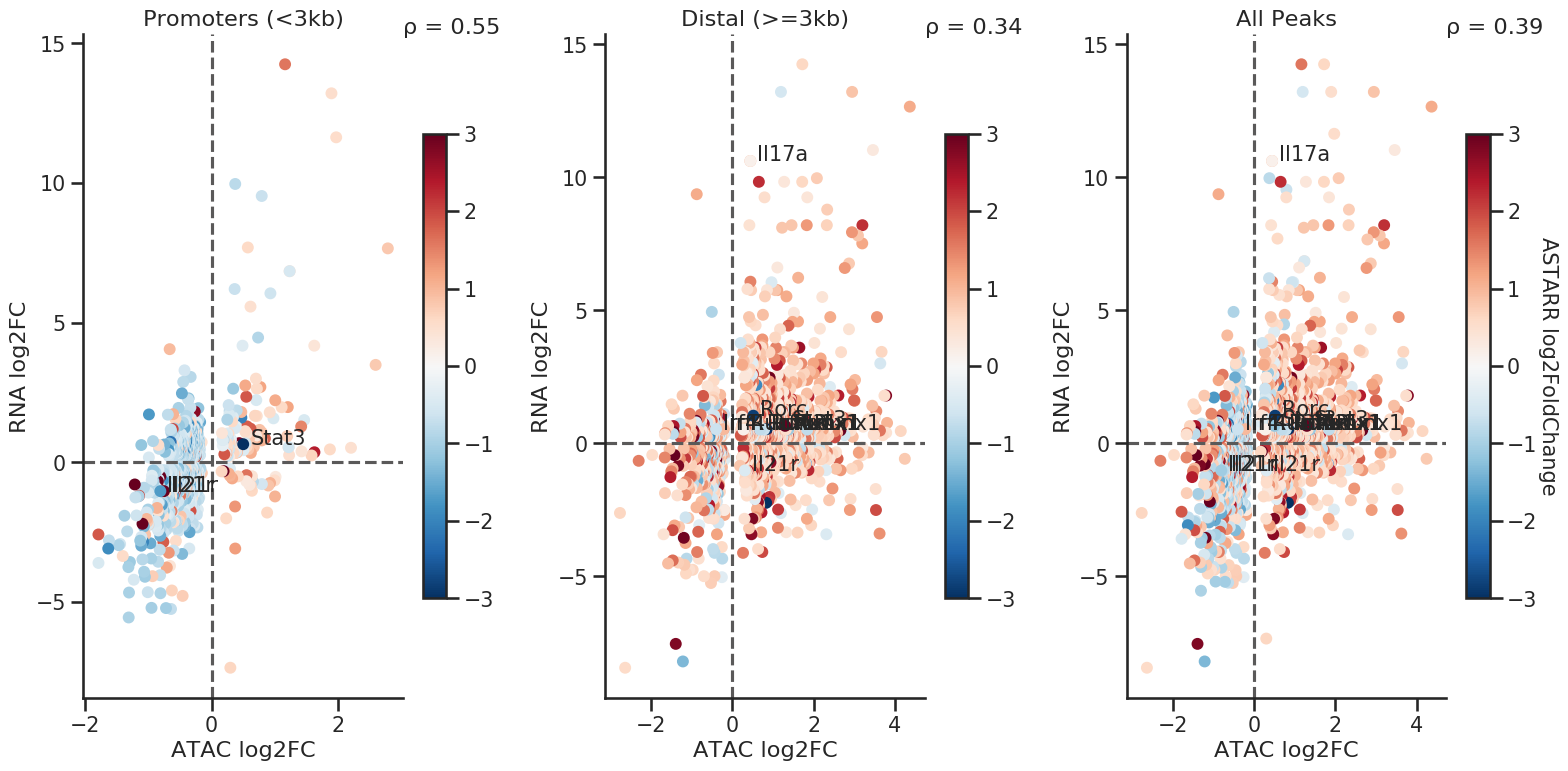

In [11]:
### Scatterplot for promoter(<3kb), distal(>=3kb) and all regions for ATACseq vs ASTARRseq

import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import seaborn as sns
import numpy as np
%matplotlib inline

from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt 

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = "\u03C1" # u'\u03C1'
    ax.annotate('%s = %.2f' % (rho, r), xy=(1, 1), xycoords=ax.transAxes)
    
#plt.rcParams['pdf.fonttype'] = 42
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("talk", font_scale=0.9)
plt.rcParams.update({'figure.figsize':(16,8), 'figure.dpi':100})

fig, ax = plt.subplots(1, 3)

ax1 = ax.flatten()[0]
points = ax1.scatter(
    ATAC_RNA_ASTARR_distance_filtered_intersect.loc[np.abs(ATAC_RNA_ASTARR_distance_filtered_intersect.distance)<3000, 'ATAC_log2FoldChange'], 
    ATAC_RNA_ASTARR_distance_filtered_intersect.loc[np.abs(ATAC_RNA_ASTARR_distance_filtered_intersect.distance)<3000, 'RNA_log2FoldChange'],
    c=ATAC_RNA_ASTARR_distance_filtered_intersect.loc[np.abs(ATAC_RNA_ASTARR_distance_filtered_intersect.distance)<3000, 'ASTARR_log2FoldChange'],
    cmap='RdBu_r', marker='o', s=50, label='All hits')

for x, y, t in zip(
    ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.loc[np.abs(ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.distance)<3000, 'ATAC_log2FoldChange'],
    ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.loc[np.abs(ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.distance)<3000, 'RNA_log2FoldChange'], 
    ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.loc[np.abs(ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.distance)<3000, 'GeneName']) :
    ax1.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=15)

ax1.scatter(
    ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.loc[np.abs(ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.distance)<3000, 'ATAC_log2FoldChange'], 
    ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.loc[np.abs(ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.distance)<3000, 'RNA_log2FoldChange'],
    c=ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.loc[np.abs(ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.distance)<3000, 'ASTARR_log2FoldChange'],
    cmap='RdBu_r', marker='o', s=50)

corrfunc(
    ATAC_RNA_ASTARR_distance_filtered_intersect.loc[np.abs(ATAC_RNA_ASTARR_distance_filtered_intersect.distance)<3000, 'ATAC_log2FoldChange'], 
    ATAC_RNA_ASTARR_distance_filtered_intersect.loc[np.abs(ATAC_RNA_ASTARR_distance_filtered_intersect.distance)<3000, 'RNA_log2FoldChange'],
    ax=ax1, method='spearman')

ax1.set_xlim(ax1.get_xlim())
ax1.set_ylim(ax1.get_ylim())
ax1.vlines(0, ax1.get_ylim()[0], ax1.get_ylim()[1], color='#5A5959', linestyle='--')
ax1.hlines(0, ax1.get_xlim()[0], ax1.get_xlim()[1], color='#5A5959', linestyle='--')
ax1.set_xlabel('ATAC log2FC')
ax1.set_ylabel('RNA log2FC')
ax1.set_title('Promoters (<3kb)')

cbar = fig.colorbar(points, shrink=0.7, ax=ax1)
#cbar.set_label('ASTARR log2FoldChange', rotation=270, labelpad=15, fontsize=15)
cbar.mappable.set_clim(-3,3)

ax2 = ax.flatten()[1]
points = ax2.scatter(
    ATAC_RNA_ASTARR_distance_filtered_intersect.loc[np.abs(ATAC_RNA_ASTARR_distance_filtered_intersect.distance)>=3000, 'ATAC_log2FoldChange'], 
    ATAC_RNA_ASTARR_distance_filtered_intersect.loc[np.abs(ATAC_RNA_ASTARR_distance_filtered_intersect.distance)>=3000, 'RNA_log2FoldChange'],
    c=ATAC_RNA_ASTARR_distance_filtered_intersect.loc[np.abs(ATAC_RNA_ASTARR_distance_filtered_intersect.distance)>=3000, 'ASTARR_log2FoldChange'],
    cmap='RdBu_r', marker='o', s=50, label='All hits')

for x, y, t in zip(
    ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.loc[np.abs(ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.distance)>=3000, 'ATAC_log2FoldChange'],
    ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.loc[np.abs(ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.distance)>=3000, 'RNA_log2FoldChange'], 
    ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.loc[np.abs(ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.distance)>=3000, 'GeneName']) :
    ax2.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=15)
    
ax2.scatter(
    ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.loc[np.abs(ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.distance)>=3000, 'ATAC_log2FoldChange'], 
    ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.loc[np.abs(ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.distance)>=3000, 'RNA_log2FoldChange'],
    c=ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.loc[np.abs(ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.distance)>=3000, 'ASTARR_log2FoldChange'],
    cmap='RdBu_r', marker='o', s=50)

corrfunc(
    ATAC_RNA_ASTARR_distance_filtered_intersect.loc[np.abs(ATAC_RNA_ASTARR_distance_filtered_intersect.distance)>=3000, 'ATAC_log2FoldChange'], 
    ATAC_RNA_ASTARR_distance_filtered_intersect.loc[np.abs(ATAC_RNA_ASTARR_distance_filtered_intersect.distance)>=3000, 'RNA_log2FoldChange'],
    ax=ax2, method='spearman')

ax2.set_xlim(ax2.get_xlim())
ax2.set_ylim(ax2.get_ylim())
ax2.vlines(0, ax2.get_ylim()[0], ax2.get_ylim()[1], color='#5A5959', linestyle='--')
ax2.hlines(0, ax2.get_xlim()[0], ax2.get_xlim()[1], color='#5A5959', linestyle='--')
ax2.set_xlabel('ATAC log2FC')
ax2.set_ylabel('RNA log2FC')
ax2.set_title('Distal (>=3kb)')

cbar = fig.colorbar(points, shrink=0.7, ax=ax2)
#cbar.set_label('ASTARR log2FoldChange', rotation=270, labelpad=15, fontsize=15)
cbar.mappable.set_clim(-3,3)

ax3 = ax.flatten()[2]
points = ax3.scatter(
    ATAC_RNA_ASTARR_distance_filtered_intersect.loc[:, 'ATAC_log2FoldChange'], 
    ATAC_RNA_ASTARR_distance_filtered_intersect.loc[:, 'RNA_log2FoldChange'],
    c=ATAC_RNA_ASTARR_distance_filtered_intersect.loc[:, 'ASTARR_log2FoldChange'],
    cmap='RdBu_r', marker='o', s=50, label='All hits')

for x, y, t in zip(
    ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.loc[:, 'ATAC_log2FoldChange'],
    ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.loc[:, 'RNA_log2FoldChange'], 
    ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.loc[:, 'GeneName']) :
    ax3.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=15)
    
ax3.scatter(
    ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.loc[:, 'ATAC_log2FoldChange'], 
    ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.loc[:, 'RNA_log2FoldChange'],
    c=ATAC_RNA_ASTARR_distance_filtered_intersect_spGenes.loc[:, 'ASTARR_log2FoldChange'],
    cmap='RdBu_r', marker='o', s=50)

corrfunc(
    ATAC_RNA_ASTARR_distance_filtered_intersect.loc[:, 'ATAC_log2FoldChange'], 
    ATAC_RNA_ASTARR_distance_filtered_intersect.loc[:, 'RNA_log2FoldChange'],
    ax=ax3, method='spearman')

ax3.set_xlim(ax3.get_xlim())
ax3.set_ylim(ax3.get_ylim())
ax3.vlines(0, ax3.get_ylim()[0], ax3.get_ylim()[1], color='#5A5959', linestyle='--')
ax3.hlines(0, ax3.get_xlim()[0], ax3.get_xlim()[1], color='#5A5959', linestyle='--')
ax3.set_xlabel('ATAC log2FC')
ax3.set_ylabel('RNA log2FC')
ax3.set_title('All Peaks')

cbar = fig.colorbar(points, shrink=0.7, ax=ax3)
cbar.set_label('ASTARR log2FoldChange', rotation=270, labelpad=15, fontsize=15)
cbar.mappable.set_clim(-3,3)

sns.despine(fig,ax)
plt.tight_layout()
plt.savefig('/data/reddylab/Revathy/dev/Keith/data/integrative/plots/Th17_ATAC_RNA_ASTARR_distance_filtered_coordinate_plots.pdf')
plt.show()